In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = '/home/thiemcun/Customer-Churn-Analysis/telco-customer-churn.csv'
file_path = '/Users/nguyenbathiem/Documents/GitHub/Customer-Churn-Analysis/telco-customer-churn.csv'

In [2]:
# Basic imports
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

# DATA PROCESSING

In [3]:
# Load data in DataFrame
data = pd.read_csv(file_path)

## Data overview

In [4]:
# 5 first records
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [12]:
# 5 last records
data.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

From the dataset description, we learn that each row corresponds to a customer.
The data set includes information about:

- Customers who **left** within the last month
- **Services** that each customer has signed up for, which may include phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer **account information**: how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Customer **demographic information**: gender, age range, and if they have partners and dependents

In [14]:
# Dataset size
data.shape

(7043, 21)

In total, the dataset consists of **21** columns, where the first column represents the **customerID**, and the final column displays whether the customer terminates their TelCo subscription (i.e. **churn**) or not. There are **7043** records.

In [15]:
data['customerID'].nunique()

7043

We confirm that the customer IDs in the dataset are entirely **unique**. The dataset description marks the date for all observations as an unspecified "last month", confirming that each distict row is a distinct customer, and there is **no repetition in sampling**.

## Data cleaning

### Insignificant attribute removal

In [16]:
 # Details on columns in dataset: name, non-null count, data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It is clear that customerID is a unique field that does **not contribute to or impact** any other attributes in the dataset. Thus, we will remove this column.

In [17]:
data.drop('customerID', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Data type change

The data type for TotalCharges column should be **float64** rather than object.

In [18]:
try:
  data["TotalCharges"] = data["TotalCharges"].astype(float) # Throws error: Cannot convert ' ' to float
except:
  print("Error: Cannot convert string to float: ' '")

Error: Cannot convert string to float: ' '


This error suggests that though the TotalCharges column has no null value, there are indeed records where the TotalCharges value is **left blank (' ')**. We want to identify and investigate these rows.

In [19]:
indices_to_investigate = []
for i, x in enumerate(data["TotalCharges"].tolist()):
  if x == " ":
    indices_to_investigate.append(i)
print("Total number of records with blank total charge:", len(indices_to_investigate))
data.iloc[indices_to_investigate, :]

Total number of records with blank total charge: 11


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

There are **11** such cases where the total charge is left blank. A common trend to notice here is **tenure being 0**, which might correspond to new subscribers to TelCo who have not used the service at all, thus explaining the **blank total charges** and the fact that they did **not churn**.

In [20]:
print("Total number of records with tenure being 0:",data[data['tenure'] == 0].shape[0])

Total number of records with tenure being 0: 11


We confirm that the aforementioned 11 records are also the **only 11 records** in the entire dataset where **tenure is 0**. In building a classifier model to predict churn, these records offer no training value, since no churn will automatically follow tenure being 0 (a customer who just subscribed will not terminate immediately). Thus, we will **remove** these records from our dataset.

### Missing value removal

In [21]:
data.drop(indices_to_investigate, axis=0, inplace=True)
data = data.reset_index(drop=True)
data

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7027    Male              0     Yes        Yes      24          Yes   
7028  Female              0     Yes        Yes      72          Yes   
7029  Female              0     Yes        Yes      11           No   
7030    Male              1     Yes         No       4          Yes   
7031    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7027               Yes             DSL            Yes           No   
7028               Yes     Fiber optic             No          Yes   
7029  No phone service             DSL            Yes           No   
7030               Yes     Fiber optic             No           No   
7031                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7027              Yes         Yes         Yes             Yes        One year   
7028              Yes          No         Yes             Yes        One year   
7029               No          No          No              No  Month-to-month   
7030               No          No          No              No  Month-to-month   
7031              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
1                  No               Mailed check           56.95       1889.5   
2                 Yes               Mailed check           53.85       108.15   
3                  No  Bank transfer (automatic)           42.30      1840.75   
4                 Yes           Electronic check           70.70       151.65   
...               ...                        ...             ...          ...   
7027              Yes               Mailed check           84.80       1990.5   
7028              Yes    Credit card (automatic)          103.20       7362.9   
7029              Yes           Electronic check           29.60       346.45   
7030              Yes               Mailed check           74.40        306.6   
7031              Yes  Bank transfer (automatic)          105.65       6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7027    No  
7028    No  
7029    No  
7030   Yes  
7031    No  

[7032 rows x 20 columns]

We confirm to have removed the aforementioned 11 records. We also **reset** the index so as to avoid having blanks in the row indices.

In [22]:
data["TotalCharges"] = data["TotalCharges"].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


The code to change data type works now, suggesting that we have fully deleted the 11 records without TotalCharges value. The data type for MonthlyCharges has been changed to **float64**, which would be more suitable for future computations. **7032** records remain.

### Duplicate removal

In [23]:
print("Total number of records that are duplicates:", data[data.duplicated()].shape[0])

Total number of records that are duplicates: 22


There are indeed instances of customers who share the **exact same information**. However, from the dataset description, we have established that the data sampling here are from **distinct customers**. In reality, the possibility that two customers share the exact same demographic, service, account information, and churn is **not impossible**. Thus, we opt to r**etain all duplicates**, since they can actually represent real-life patterns instead of bias sampling.

## Numeric to categorical conversion

In [156]:
data["SeniorCitizen"]

0       0
1       0
2       0
3       0
4       0
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: SeniorCitizen, Length: 7032, dtype: int64

The nature of this column is categorical, despite being presented in the dataset as integer 0s and 1s. For the sheer sake of cohesion, these 0s and 1s will be converted into "No" and "Yes"

In [157]:
data["SeniorCitizen"] = data["SeniorCitizen"].replace({0: "No", 1: "Yes"})
data["SeniorCitizen"]

0        No
1        No
2        No
3        No
4        No
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: SeniorCitizen, Length: 7032, dtype: object

## Categorical to numeric conversion

In [24]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

Overall, the majority of the dataset deals with **categorical** values. Many of these (gender, SeniorCitizen, Partner,...) are binary variables, while others take on more values (3-4).

In [25]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(dataset):
  all_columns = dataset.columns.tolist()
  discrete_columns = [column for column in dataset.columns.tolist() if dataset[column].nunique() in [2, 3, 4]]
  encoded_data = pd.DataFrame()

  for column in all_columns:
    if column in discrete_columns and dataset[column].nunique() > 2:
      encoder = OneHotEncoder(sparse_output=False)
      encoded_column = encoder.fit_transform(dataset[[column]])
      column_names = [f"{column}_{value}" for value in encoder.categories_[0]]
      encoded_df = pd.DataFrame(encoded_column, columns=column_names)
      encoded_data = pd.concat([encoded_data, encoded_df], axis=1)
    elif column == "gender":
      encoded_data[column] = dataset[column].replace({"Female": 0, "Male": 1})
    elif column in discrete_columns and dataset[column].nunique() == 2:
      encoded_data[column] = dataset[column].replace({"No": 0, "Yes": 1})
    else:
      encoded_data[column] = dataset[column]

  return encoded_data

encoded_data = one_hot_encode(data)

Here, we present the code to parse through all columns in the dataset. Whenever it encounters a column that is **not discrete**, it remains *unchanged*. When a column takes on **binary values**, 'Yes' and 'No' (or 'Male' and 'Female') simply get mapped to *1 and 0*, respectively. For the rest, **one-hot encoding** is applied. For instance, a tertiary-valued column gets transformed into three columns, only one of which has value 1 for each record.

In [26]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines_No                         7032 non-null   float64
 7   MultipleLines_No phone service           7032 non-null   float64
 8   MultipleLines_Yes                        7032 non-null   float64
 9   InternetService_DSL                      7032 non-null   float64
 10  InternetService_Fiber optic              7032 no

In [27]:
encoded_data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
0               0.0                             1.0                0.0   
1               1.0                             0.0                0.0   
2               1.0                             0.0                0.0   
3               0.0                             1.0                0.0   
4               1.0                             0.0                0.0   

   InternetService_DSL  ...  Contract_One year  Contract_Two year  \
0                  1.0  ...                0.0                0.0   
1                  1.0  ...                1.0                0.0   
2                  1.0  ...                0.0                0.0   
3                  1.0  ...                1.0                0.0   
4                  0.0  ...                0.0                0.0   

   PaperlessBilling  PaymentMethod_Bank transfer (automatic)  \
0                 1                                      0.0   
1                 0                                      0.0   
2                 1                                      0.0   
3                 0                                      1.0   
4                 1                                      0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  MonthlyCharges  TotalCharges  Churn  
0                         0.0           29.85         29.85      0  
1                         1.0           56.95       1889.50      0  
2                         1.0           53.85        108.15      1  
3                         0.0           42.30       1840.75      0  
4                         0.0           70.70        151.65      1  

[5 rows x 41 columns]

We can see that all discrete-valued columns have been one-hot encoded into **binary-valued** columns. Thus, we obtain a **numeric representation** of our data, which is needed for Machine Learning algorithms for churn prediction in a later part of this project.</br>
Note that the number of columns are **doubled** now because of the encoding, and a lot of the columns are **sparse** i.e. containing a lot of 0s. We may want to introduce **dimensionality reduction** before passing the data to a classifer model. This encoded data will be used later on in a **classifier model** to predict churn.

## Outlier detection

The motivation behind outlier detection is to investigate into any irregularities that might appear in the dataset, which might be problematic for feature normalization below.</br>
Outlier detection is only performed on numeric attributes in the dataset: tenure, MonthlyCharges, and TotalCharges

In [28]:
data[["tenure", "MonthlyCharges", "TotalCharges"]].agg([np.min, np.mean, np.median, np.max, np.std])

tenure  MonthlyCharges  TotalCharges
amin     1.000000       18.250000     18.800000
mean    32.421786       64.798208   2283.300441
median  29.000000       70.350000   1397.475000
amax    72.000000      118.750000   8684.800000
std     24.545260       30.085974   2266.771362

Surveying these statistics is often insufficient in detecting outliers. Thus. we will employ more complex methods and tests.

### Grubbs test

Grubbs' test is defined for the hypothesis: </br>
$H_{0}$: There are no outliers in the data set </br>
$H_{1}$: There is exactly one outlier in the data set </br>

The Grubbs' test statistic is defined as: </br>
$G_{calculated} = \frac{max|X_{i}-\bar{X}|}{SD}$ </br>
with $\bar{X}$ and $SD$ denoting the sample mean and standard deviation, respectively. </br>
$G_{critical} = \frac{{N - 1}}{{\sqrt{N}}}\sqrt{\frac{{t_{\alpha/(2N), N-2}^2}}{{N - 2 + t_{\alpha/(2N), N-2}^2}}}$

If the calculated value is greater than critical, the null hypothesis can be rejected and it can be concluded that one of the values is an outlier.

In [29]:
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there are no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there are an outliers\n")

print("tenure")
grubbs_test(data["tenure"].to_numpy())
print("MonthlyCharges")
grubbs_test(data["MonthlyCharges"].to_numpy())
print("TotalCharges")
grubbs_test(data["TotalCharges"].to_numpy())

tenure
Grubbs Calculated Value: 1.6125732136881425
Grubbs Critical Value: 4.4872995984066515
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there are no outliers

MonthlyCharges
Grubbs Calculated Value: 1.7933814803098413
Grubbs Critical Value: 4.4872995984066515
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there are no outliers

TotalCharges
Grubbs Calculated Value: 2.8242613633457254
Grubbs Critical Value: 4.4872995984066515
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there are no outliers



None of the attributes display signs of outliers. We will employ another method.

### Z-score method

In a normal curve,
* 68% of the data points lie between + or - 1 standard deviation,
* 95% of the data points lie between + or - 2 standard deviations,
* 99.7% of the data points lie between + or - 3 standard deviations.
</br>

$Z_{score} = \frac{X − \bar{X}}{SD}$

If the Z-score of a data point is more than 3, this is an indication that the data value is significantly different than the majority of data points, since 99.7% of data should be within 3 standard deviations of the mean. Thus, it is taken as an outlier.

In [30]:
def Z_score_outlier(df):
    out = list()
    m = np.mean(df)
    sd = np.std(df)
    for i in df:
        z = (i-m)/sd
        if np.abs(z) > 3:
            out.append(i)
    print("Outliers:", out)

print("tenure")
Z_score_outlier(data["tenure"])
print("MonthlyCharges")
Z_score_outlier(data["MonthlyCharges"])
print("TotalCharges")
Z_score_outlier(data["TotalCharges"])

tenure
Outliers: []
MonthlyCharges
Outliers: []
TotalCharges
Outliers: []


Again, none of the attributes display signs of outliers. We will employ another method.

### IQR method

In this method, outliers are detected by using Inter Quartile Range(IQR). IQR is another measure of variation in the data set. Any value beyond the range of (Q1 - 1.5 x IQR) to (Q3 + 1.5 x IQR) is treated as an outlier.
* Q1 represents the 1st quartile/25th percentile of the data.
* Q2 represents the 2nd quartile/median/50th percentile of the data.
* Q3 represents the 3rd quartile/75th percentile of the data.
* IQR = Q3 - Q1

In [31]:
def iqr_outliers(df):
    out = list()
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > upper_tail or i < lower_tail:
            out.append(i)
    print("Outliers:",out)

print("tenure")
iqr_outliers(data["tenure"])
print("MonthlyCharges")
iqr_outliers(data["MonthlyCharges"])
print("TotalCharges")
iqr_outliers(data["TotalCharges"])

tenure
Outliers: []
MonthlyCharges
Outliers: []
TotalCharges
Outliers: []


Again, none of the attributes display signs of outliers. We conclude that outliers are a non-issue in this problem and use min-max feature normalization as follows.

## Feature normalization

In [32]:
encoded_data["tenure"] = encoded_data["tenure"].to_numpy()/np.max(encoded_data["tenure"].to_numpy())
encoded_data["MonthlyCharges"] = encoded_data["MonthlyCharges"].to_numpy()/np.max(encoded_data["MonthlyCharges"].to_numpy())
encoded_data["TotalCharges"] = encoded_data["TotalCharges"].to_numpy()/np.max(encoded_data["TotalCharges"].to_numpy())
encoded_data.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.013889             0   
1       1              0        0           0  0.472222             1   
2       1              0        0           0  0.027778             1   
3       1              0        0           0  0.625000             0   
4       0              0        0           0  0.027778             1   

   MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
0               0.0                             1.0                0.0   
1               1.0                             0.0                0.0   
2               1.0                             0.0                0.0   
3               0.0                             1.0                0.0   
4               1.0                             0.0                0.0   

   InternetService_DSL  ...  Contract_One year  Contract_Two year  \
0                  1.0  ...                0.0                0.0   
1                  1.0  ...                1.0                0.0   
2                  1.0  ...                0.0                0.0   
3                  1.0  ...                1.0                0.0   
4                  0.0  ...                0.0                0.0   

   PaperlessBilling  PaymentMethod_Bank transfer (automatic)  \
0                 1                                      0.0   
1                 0                                      0.0   
2                 1                                      0.0   
3                 0                                      1.0   
4                 1                                      0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  MonthlyCharges  TotalCharges  Churn  
0                         0.0        0.251368      0.003437      0  
1                         1.0        0.479579      0.217564      0  
2                         1.0        0.453474      0.012453      1  
3                         0.0        0.356211      0.211951      0  
4                         0.0        0.595368      0.017462      1  

[5 rows x 41 columns]

All numeric attributes now have values between 0 and 1.

# BASIC EXPLORATORY ANALYSIS

## Output
**Churn** is the observation of whether a customer continues or stops subscribing to a service (in this case, TelCo). Specifically, churn being **no** corresponds to a continuation, while churning being **yes** corresponds to a termination of service.

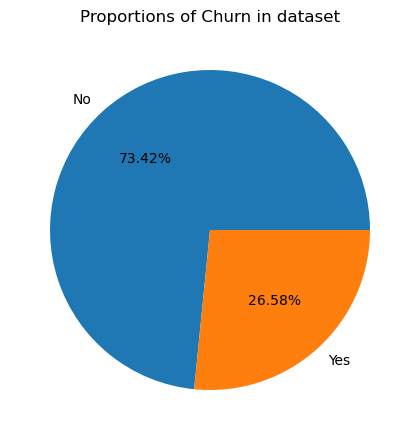

In [33]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')

labels = data["Churn"].unique().tolist()
count = data["Churn"].value_counts().tolist()

ax.pie(count, labels=labels, autopct='%1.2f%%')
plt.title("Proportions of Churn in dataset")
plt.show()

We can see that the dataset contains an inherent imbalance in its output. Only a quarter of customers cancelled their subscription, while the rest continues.

## Demographic information

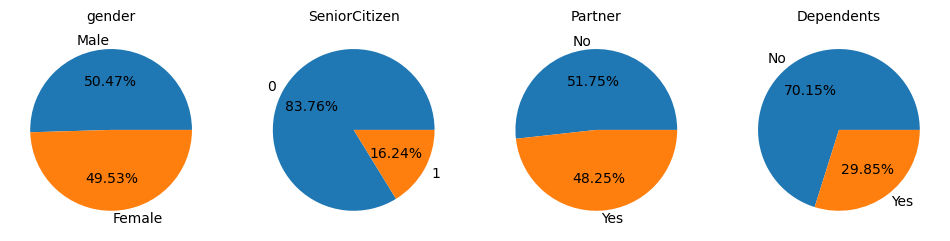

In [34]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# gender (M-F)
labels = ["Male", "Female"]
count = data["gender"].value_counts().tolist()
axes[0].pie(count, labels=labels, autopct='%1.2f%%')
axes[0].set_title("gender", fontsize=10)

# SeniorCitizen (Y-N)
labels = data["SeniorCitizen"].unique().tolist()
count = data["SeniorCitizen"].value_counts().tolist()
axes[1].pie(count, labels=labels, autopct='%1.2f%%')
axes[1].set_title("SeniorCitizen", fontsize=10)

# Partner (Y-N)
labels = ["No", "Yes"]
count = data["Partner"].value_counts().tolist()
axes[2].pie(count, labels=labels, autopct='%1.2f%%')
axes[2].set_title("Partner", fontsize=10)

# Dependents (Y-N)
labels = data["Dependents"].unique().tolist()
count = data["Dependents"].value_counts().tolist()
axes[3].pie(count, labels=labels, autopct='%1.2f%%')
axes[3].set_title("Dependents", fontsize=10)

plt.show()

Gender-wise, the dataset is relatively **balanced**.</br>
The same can be said, partner-wise, though the difference is more pronouced (slightly more customers without partners than with).</br>
From values in SeniorCitizen, we can see that **non-seniors** are a major demographic in the dataset.</br>
Likewise for people with **no dependent**.</br>
This is a simple univariate survey, and we'd better examine the interaction between these 3 different demographic features.

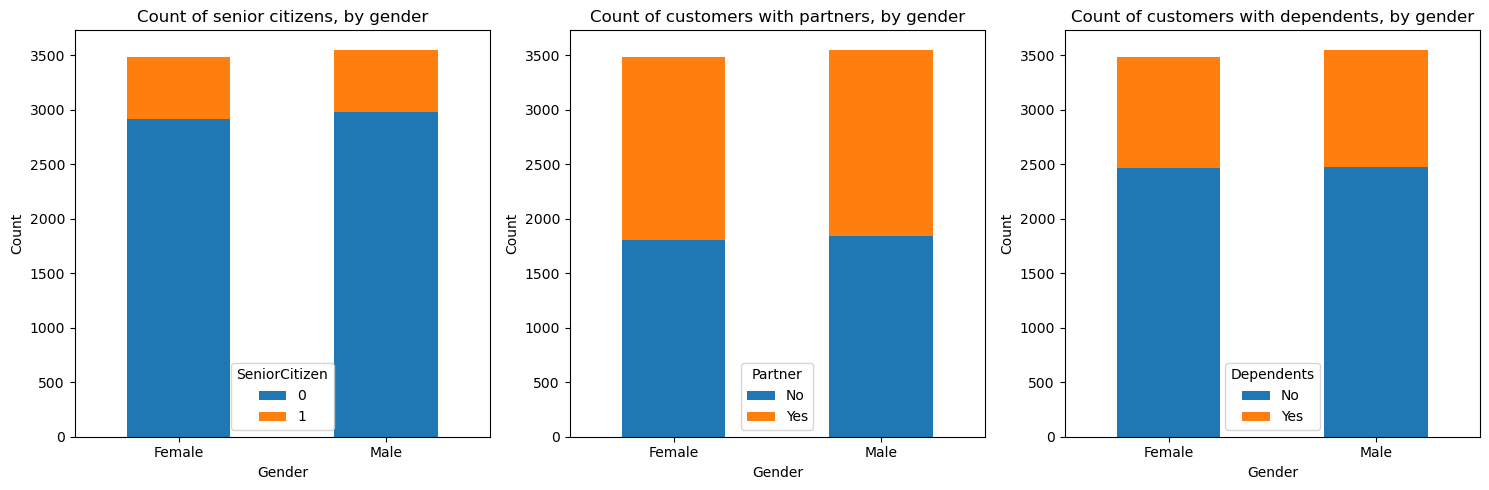

In [35]:
# Create the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# First subplot: Count of senior citizens by gender
ax1 = data.groupby("gender")["SeniorCitizen"].value_counts().unstack(level=1).plot(kind='bar', stacked=True, ax=axes[0])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_xlabel("Gender")
ax1.set_ylabel("Count")
ax1.set_title("Count of senior citizens, by gender")

# Second subplot: Count of customers with partners by gender
ax2 = data.groupby("gender")["Partner"].value_counts().unstack(level=1).plot(kind='bar', stacked=True, ax=axes[1])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_xlabel("Gender")
ax2.set_ylabel("Count")
ax2.set_title("Count of customers with partners, by gender")

# Third subplot: Count of customers with dependents by gender
ax3 = data.groupby("gender")["Dependents"].value_counts().unstack(level=1).plot(kind='bar', stacked=True, ax=axes[2])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.set_xlabel("Gender")
ax3.set_ylabel("Count")
ax3.set_title("Count of customers with dependents, by gender")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()

These plots confirm that gender is mostly balanced when grouped by any other demographic information ((non-)SeniorCitizen, with(out) Partner, with(out) Dependents)

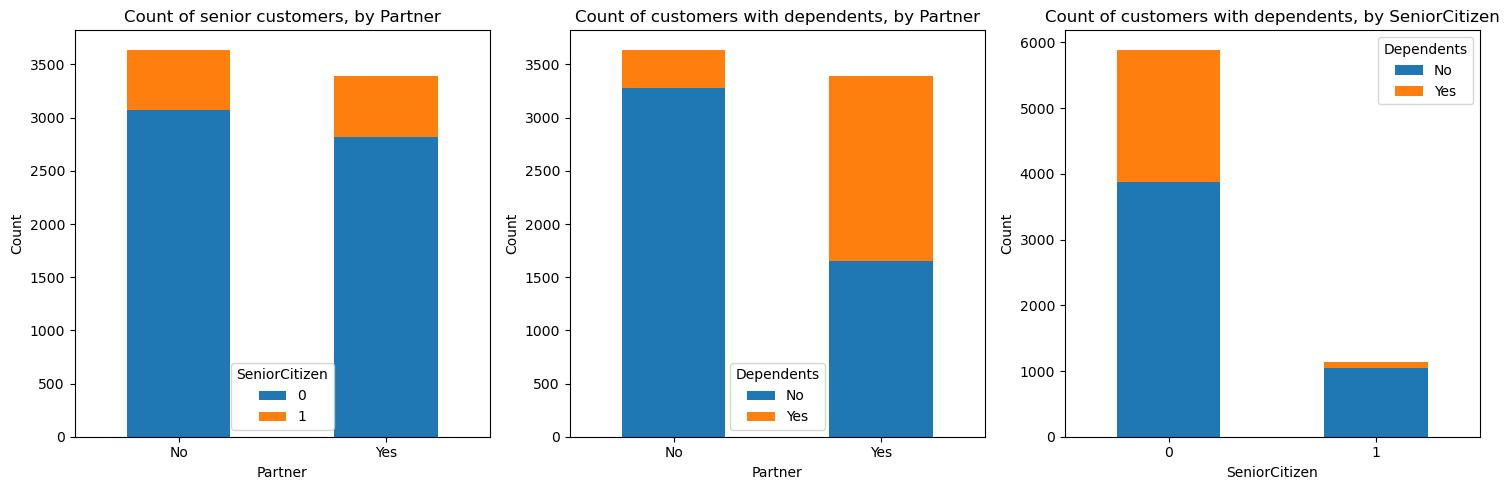

In [36]:
# Create the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# First subplot: Count of senior customers by Partner
ax1 = data.groupby("Partner")["SeniorCitizen"].value_counts().unstack(level=1).plot(kind='bar', stacked=True, ax=axes[0])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_xlabel("Partner")
ax1.set_ylabel("Count")
ax1.set_title("Count of senior customers, by Partner")

# Second subplot: Count of customers with dependers by Partner
ax2 = data.groupby("Partner")["Dependents"].value_counts().unstack(level=1).plot(kind='bar', stacked=True, ax=axes[1])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_xlabel("Partner")
ax2.set_ylabel("Count")
ax2.set_title("Count of customers with dependents, by Partner")

# Third subplot: Count of customers with dependers by SeniorCitizen
ax3 = data.groupby("SeniorCitizen")["Dependents"].value_counts().unstack(level=1).plot(kind='bar', stacked=True, ax=axes[2])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.set_xlabel("SeniorCitizen")
ax3.set_ylabel("Count")
ax3.set_title("Count of customers with dependents, by SeniorCitizen")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()

This chart confirms that customers without partners slightly exceed those with, while customers without dependents and non-seniors take the majority. Fittingly, the **majority of customers with dependents** have **partners**, and the **majority with dependents** are **non-seniors**.

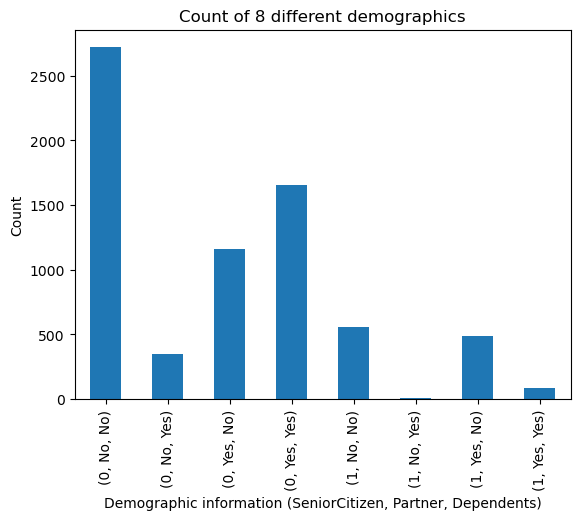

In [37]:
data.groupby(["SeniorCitizen", "Partner", "Dependents"]).size().plot(kind="bar")
plt.xlabel("Demographic information (SeniorCitizen, Partner, Dependents)")
plt.ylabel("Count")
plt.title("Count of 8 different demographics")
plt.show()

The most prominent demographic in the dataset are **non-seniors with no partners and no dependents** (approx. 2200), followed by non-seniors with partners and dependents (approx. 1600). The least represented group is seniors without partners but with dependents (8).</br>
Note that this plot does not include information regarding **gender**, since we have established that gender is equally represented when grouped by any other demographic information.

### Univariate demographic information-output relations

In [38]:
data.groupby("gender")["Churn"].value_counts()

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64

Again, gender-wise, the churn rate does not seem to differ much. Thus, we **leave gender out of the equation** when analyzing the relatoinship between demographic information and churn.

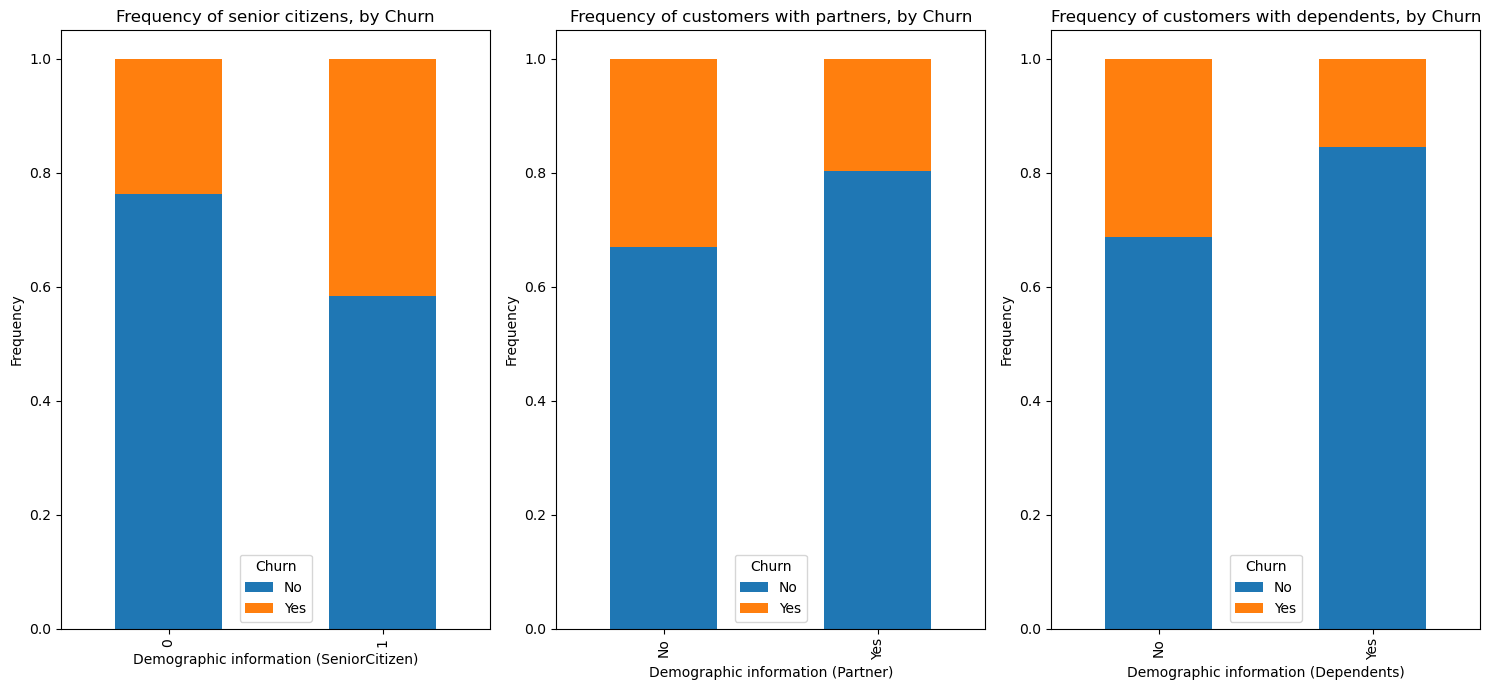

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

ax1 = data.groupby(["SeniorCitizen"])["Churn"].value_counts(normalize=True).unstack(level=1).plot(kind="bar", stacked=True, ax=axes[0])
ax1.set_xlabel("Demographic information (SeniorCitizen)")
ax1.set_ylabel("Frequency")
ax1.set_title("Frequency of senior citizens, by Churn")

ax2 = data.groupby(["Partner"])["Churn"].value_counts(normalize=True).unstack(level=1).plot(kind="bar", stacked=True, ax=axes[1])
ax2.set_xlabel("Demographic information (Partner)")
ax2.set_ylabel("Frequency")
ax2.set_title("Frequency of customers with partners, by Churn")

ax3 = data.groupby(["Dependents"])["Churn"].value_counts(normalize=True).unstack(level=1).plot(kind="bar", stacked=True, ax=axes[2])
ax3.set_xlabel("Demographic information (Dependents)")
ax3.set_ylabel("Frequency")
ax3.set_title("Frequency of customers with dependents, by Churn")

plt.tight_layout()
plt.show()

It can be concluded that **senior citizens** churn more than non-seniors. This is also the case for customers **without partners**, and customers **without dependents**.

### Multivariate demographic information-output relations

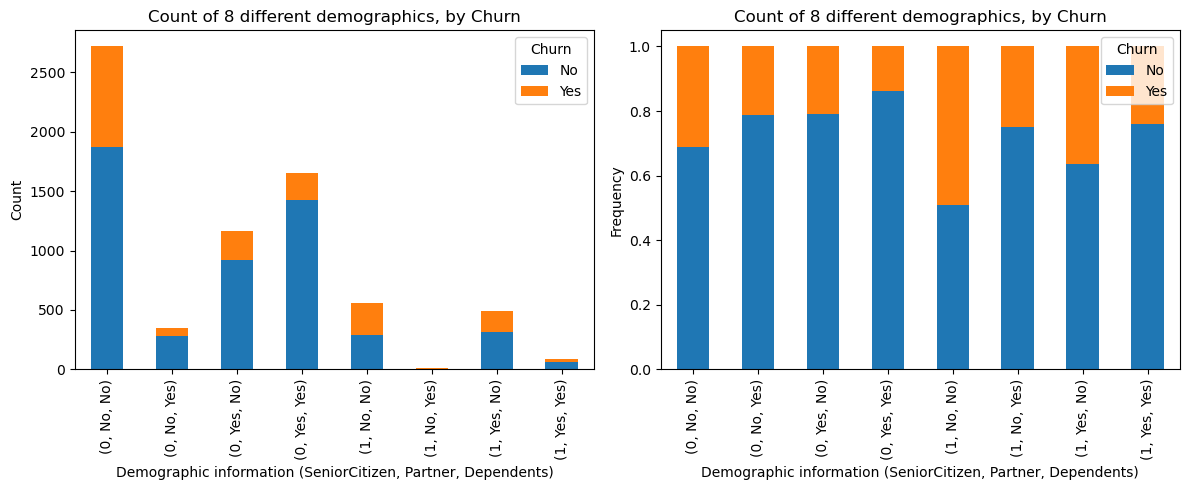

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1 = data.groupby(["SeniorCitizen", "Partner", "Dependents"])["Churn"].value_counts().unstack(level=3).plot(kind="bar", stacked=True, ax=axes[0])
ax1.set_xlabel("Demographic information (SeniorCitizen, Partner, Dependents)")
ax1.set_ylabel("Count")
ax1.set_title("Count of 8 different demographics, by Churn")

ax2 = data.groupby(["SeniorCitizen", "Partner", "Dependents"])["Churn"].value_counts(normalize=True).unstack(level=3).plot(kind="bar", stacked=True, ax=axes[1])
ax2.set_xlabel("Demographic information (SeniorCitizen, Partner, Dependents)")
ax2.set_ylabel("Frequency")
ax2.set_title("Count of 8 different demographics, by Churn")

plt.tight_layout()
plt.show()

The bar chart on the right shows the **proportion of each demographic** present in the dataset, divided by customer churn. After normalizing, we obtain the graph on the right, showing the **ratio** of customers terminating subscription within a demographic.</br>
Note that this ratio should be considered carefully, since there are demographics (such as seniors without partner, with dependents, or seniors with partner, with dependents) where few records are collected, which might render this statistic unreliable.</br>
The highest churn rate is recorded among **senior citizens without a partner and without dependents**. The lowest is among **non-seniors with a partner and with children**, staying true to the univariate analysis.

## Contract information - NUMERIC

In [41]:
# Summary statistics of numeric data
data.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

The average customer spends approx. **32 months** with TelCo, spending about **65 dollars** monthly, and accumulating a total charge of around **2300 dollars**</br>
Month-wise, the most valuable customer spends nearly **119 dollars** a month, while overall, the most valuable customer spends a total of **8685 dollars**. The most loyal customer(s) subscribes to TelCo services for **72 months**.

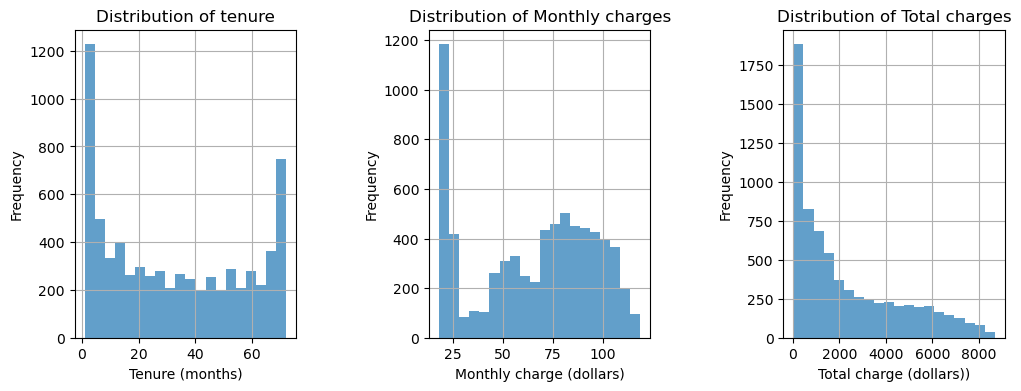

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

data["tenure"].hist(bins=20, grid=True, ax=axes[0], alpha=0.7)
axes[0].set_xlabel("Tenure (months)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of tenure")

data["MonthlyCharges"].hist(bins=20, grid=True, ax=axes[1], alpha=0.7)
axes[1].set_xlabel("Monthly charge (dollars)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Monthly charges")

data["TotalCharges"].hist(bins=20, grid=True, ax=axes[2], alpha=0.7)
axes[2].set_xlabel("Total charge (dollars))")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Distribution of Total charges")

plt.subplots_adjust(wspace=0.6)
plt.show()

There are many newcomers in the dataset (**more than 1200**), with a tenure just about 5-6 months. At the other end of the spectrum, there is also a major group of loyal subscribers (**nearly 800**) with around 70-month tenure. These two groups are the main demographic of interest to us. In the middle ground, an almost uniform distribution can be seen.

The largest section of the customers pays only around 20 dollars (probably via subscribing to only the most basic services). Apart from this spike, the remaining customers follow a rough normal distribution, with a mean at around 80 dollars monthly.

In terms of total charges, there is an evident left skewness. The majority of the customers spend an amount at the smaller end of the spectrum.

### Univariate numeric contract information-output relations

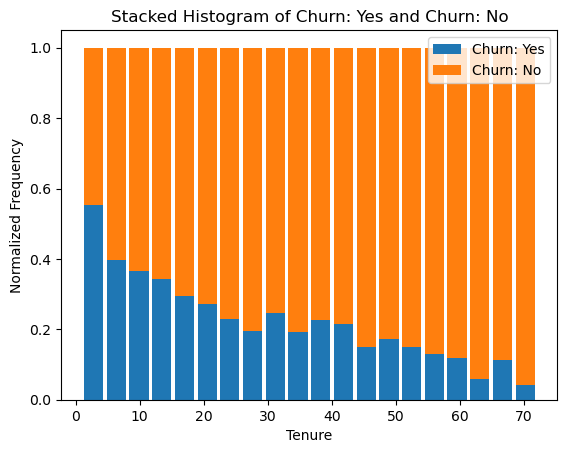

In [43]:
y = data[data["Churn"] == "Yes"]["tenure"]
n = data[data["Churn"] == "No"]["tenure"]

minimum = min(data["tenure"])
maximum = max(data["tenure"])
bins = np.linspace(minimum, maximum, 21)

y_hist, _ = np.histogram(y, bins=bins)
n_hist, _ = np.histogram(n, bins=bins)

y_hist_normed = y_hist/(y_hist + n_hist)
n_hist_normed = n_hist/(y_hist + n_hist)

bin_centers = (bins[:-1] + bins[1:]) / 2
plt.bar(bin_centers, y_hist_normed, label="Churn: Yes", width=3)
plt.bar(bin_centers, n_hist_normed, bottom=y_hist_normed, label="Churn: No", width=3)

plt.legend()
plt.xlabel("Tenure")
plt.ylabel("Normalized Frequency")
plt.title("Stacked Histogram of Churn: Yes and Churn: No")
plt.show()

A clear **downward slope** emerges. As loyalty is maintained, churning is also reduced. **Left skewness** might be explained by the phenomenon of new customers trying out services only in short term, before terminating their use.

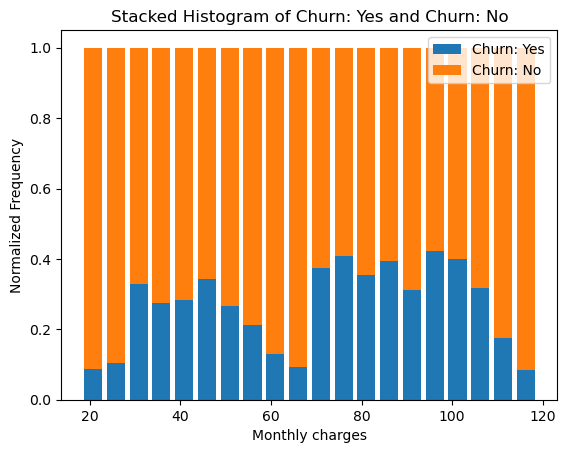

In [44]:
y = data[data["Churn"] == "Yes"]["MonthlyCharges"]
n = data[data["Churn"] == "No"]["MonthlyCharges"]

minimum = min(data["MonthlyCharges"])
maximum = max(data["MonthlyCharges"])
bins = np.linspace(minimum, maximum, 21)

y_hist, _ = np.histogram(y, bins=bins)
n_hist, _ = np.histogram(n, bins=bins)

y_hist_normed = y_hist/(y_hist + n_hist)
n_hist_normed = n_hist/(y_hist + n_hist)

bin_centers = (bins[:-1] + bins[1:]) / 2
plt.bar(bin_centers, y_hist_normed, label="Churn: Yes", width=4)
plt.bar(bin_centers, n_hist_normed, bottom=y_hist_normed, label="Churn: No", width=4)

plt.legend()
plt.xlabel("Monthly charges")
plt.ylabel("Normalized Frequency")
plt.title("Stacked Histogram of Churn: Yes and Churn: No")
plt.show()

A **bimodal** distribution of churn rate can be seen in this graph, suggesting two main types of churning customers, corresponding to a mixture of two somewhat-normal distributions.

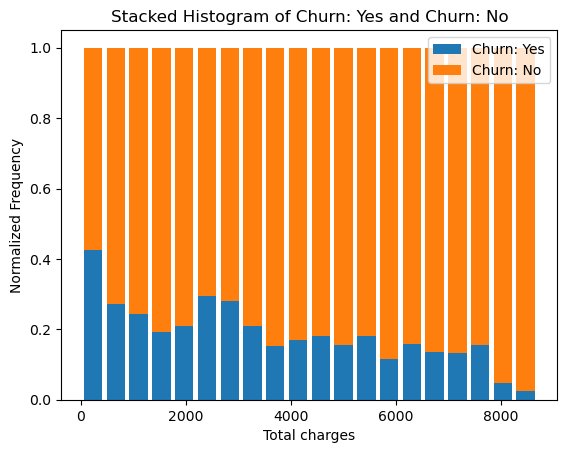

In [45]:
y = data[data["Churn"] == "Yes"]["TotalCharges"]
n = data[data["Churn"] == "No"]["TotalCharges"]

minimum = min(data["TotalCharges"])
maximum = max(data["TotalCharges"])
bins = np.linspace(minimum, maximum, 21)

y_hist, _ = np.histogram(y, bins=bins)
n_hist, _ = np.histogram(n, bins=bins)

y_hist_normed = y_hist/(y_hist + n_hist)
n_hist_normed = n_hist/(y_hist + n_hist)

bin_centers = (bins[:-1] + bins[1:]) / 2
plt.bar(bin_centers, y_hist_normed, label="Churn: Yes", width=350)
plt.bar(bin_centers, n_hist_normed, bottom=y_hist_normed, label="Churn: No", width=350)

plt.legend()
plt.xlabel("Total charges")
plt.ylabel("Normalized Frequency")
plt.title("Stacked Histogram of Churn: Yes and Churn: No")
plt.show()

From this chart, there exists a slight downward tendency in churn rate, as the total charge increases. Generally, this **corresponds with tenure**, which exhibits a similar behavior, since total charge is often dependent on the time a consumer subscribes to services.

## Contract information - CATEGORICAL

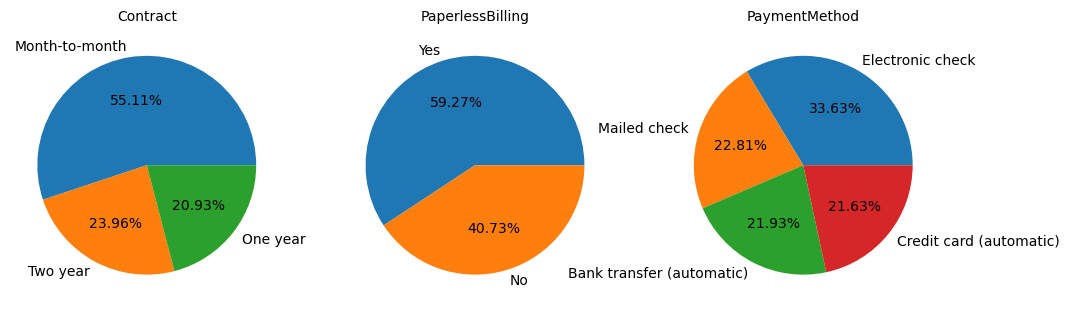

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Contract
labels = ["Month-to-month", "Two year", "One year"]
count = data["Contract"].value_counts().tolist()
axes[0].pie(count, labels=labels, autopct='%1.2f%%')
axes[0].set_title("Contract", fontsize=10)

# PaperlessBilling (Y-N)
labels = data["PaperlessBilling"].unique().tolist()
count = data["PaperlessBilling"].value_counts().tolist()
axes[1].pie(count, labels=labels, autopct='%1.2f%%')
axes[1].set_title("PaperlessBilling", fontsize=10)

# PaymentMethod (Y-N)
labels = data["PaymentMethod"].unique().tolist()
count = data["PaymentMethod"].value_counts().tolist()
axes[2].pie(count, labels=labels, autopct='%1.2f%%')
axes[2].set_title("PaymentMethod", fontsize=10)

plt.show()

For each aspect of contract information, **month-to-month contracts**, **paperless billing**, and payment via **electronic checks** are most prominent.</br>
In a similar fashion to demographic information, we ought to look into the interactions between these variables.

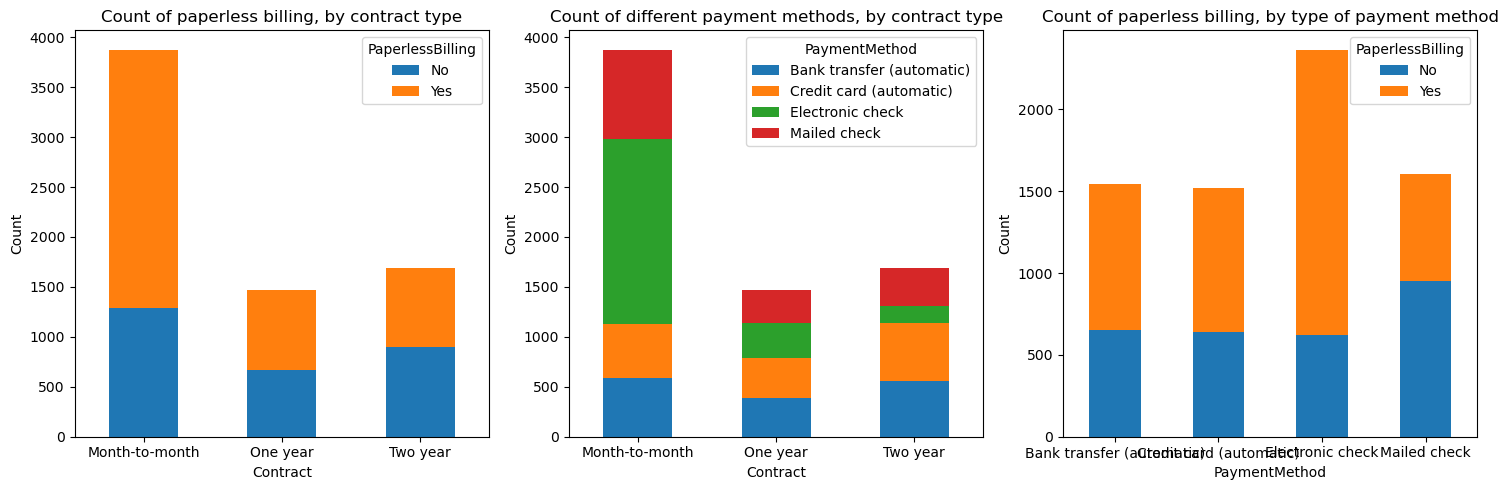

In [47]:
# Create the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# First subplot: Count of paperless billing by contract
ax1 = data.groupby("Contract")["PaperlessBilling"].value_counts().unstack(level=1).plot(kind='bar', stacked=True, ax=axes[0])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_xlabel("Contract")
ax1.set_ylabel("Count")
ax1.set_title("Count of paperless billing, by contract type")

# Second subplot: Count of different payment methods by contract
ax2 = data.groupby("Contract")["PaymentMethod"].value_counts().unstack(level=1).plot(kind='bar', stacked=True, ax=axes[1])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_xlabel("Contract")
ax2.set_ylabel("Count")
ax2.set_title("Count of different payment methods, by contract type")

# Third subplot: Count of paperless billing, by type of payment method
ax3 = data.groupby("PaymentMethod")["PaperlessBilling"].value_counts().unstack(level=1).plot(kind='bar', stacked=True, ax=axes[2])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.set_xlabel("PaymentMethod")
ax3.set_ylabel("Count")
ax3.set_title("Count of paperless billing, by type of payment method")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()

**Paperless billing** is significantly more popular in **month-to-month contracts** while balanced for the other two contract types.</br>
**Electronic checks** also dominate **month-to-month contracts**, but is much lower in popularity for longer contracts. **Automatic transfers** such as via bank or credit are prefered more for **longer contracts**.</br>
The rate of **paperless billing** is highest for **electronic checks**, understandably, and lowest for **mailed checks**.

### Univariate contract information-output relations

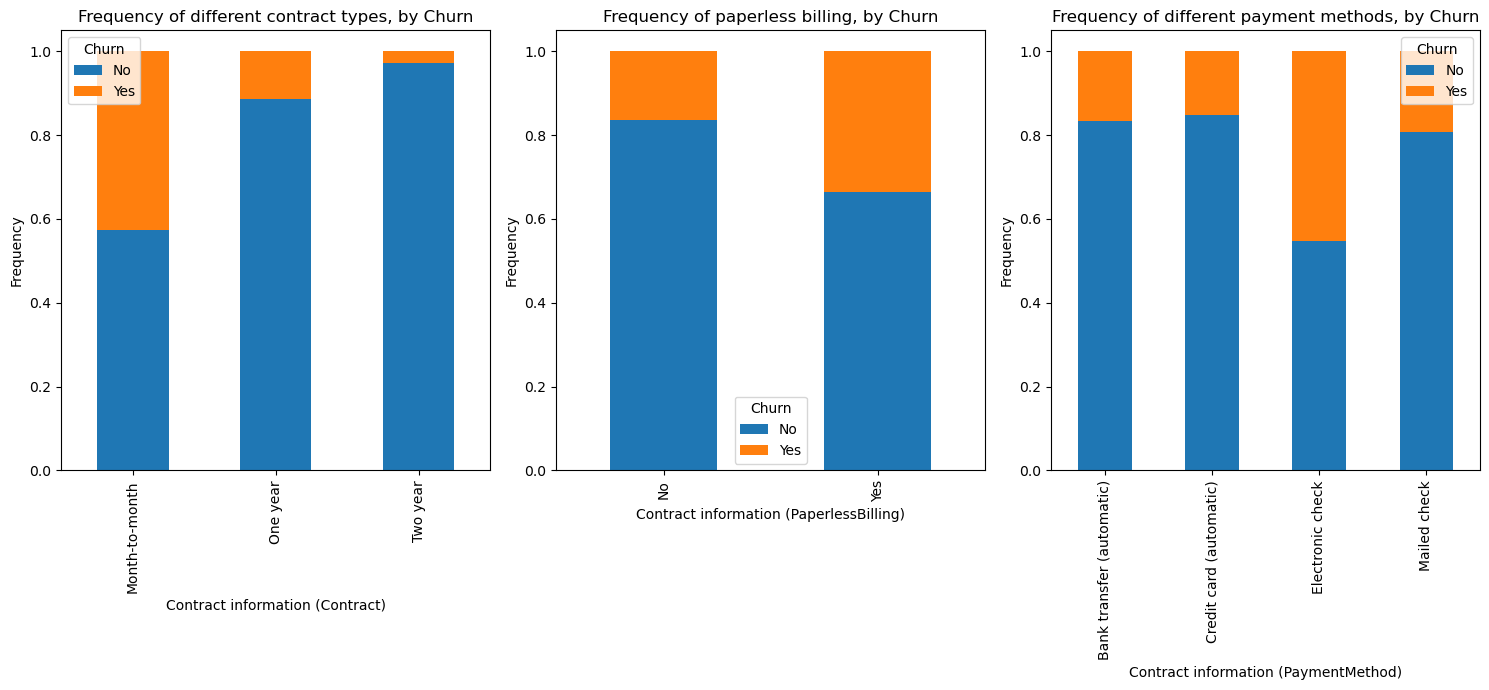

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

ax1 = data.groupby(["Contract"])["Churn"].value_counts(normalize=True).unstack(level=1).plot(kind="bar", stacked=True, ax=axes[0])
ax1.set_xlabel("Contract information (Contract)")
ax1.set_ylabel("Frequency")
ax1.set_title("Frequency of different contract types, by Churn")

ax2 = data.groupby(["PaperlessBilling"])["Churn"].value_counts(normalize=True).unstack(level=1).plot(kind="bar", stacked=True, ax=axes[1])
ax2.set_xlabel("Contract information (PaperlessBilling)")
ax2.set_ylabel("Frequency")
ax2.set_title("Frequency of paperless billing, by Churn")

ax3 = data.groupby(["PaymentMethod"])["Churn"].value_counts(normalize=True).unstack(level=1).plot(kind="bar", stacked=True, ax=axes[2])
ax3.set_xlabel("Contract information (PaymentMethod)")
ax3.set_ylabel("Frequency")
ax3.set_title("Frequency of different payment methods, by Churn")

plt.tight_layout()
plt.show()

There is a strong correlation between the length of a **contract** and **churn rate**, though causality is not directly implied, similar with the case of electronic check. **Paperless billing** also seems to correlate to a higher churn rate.

### Multivariate contract information-output relations

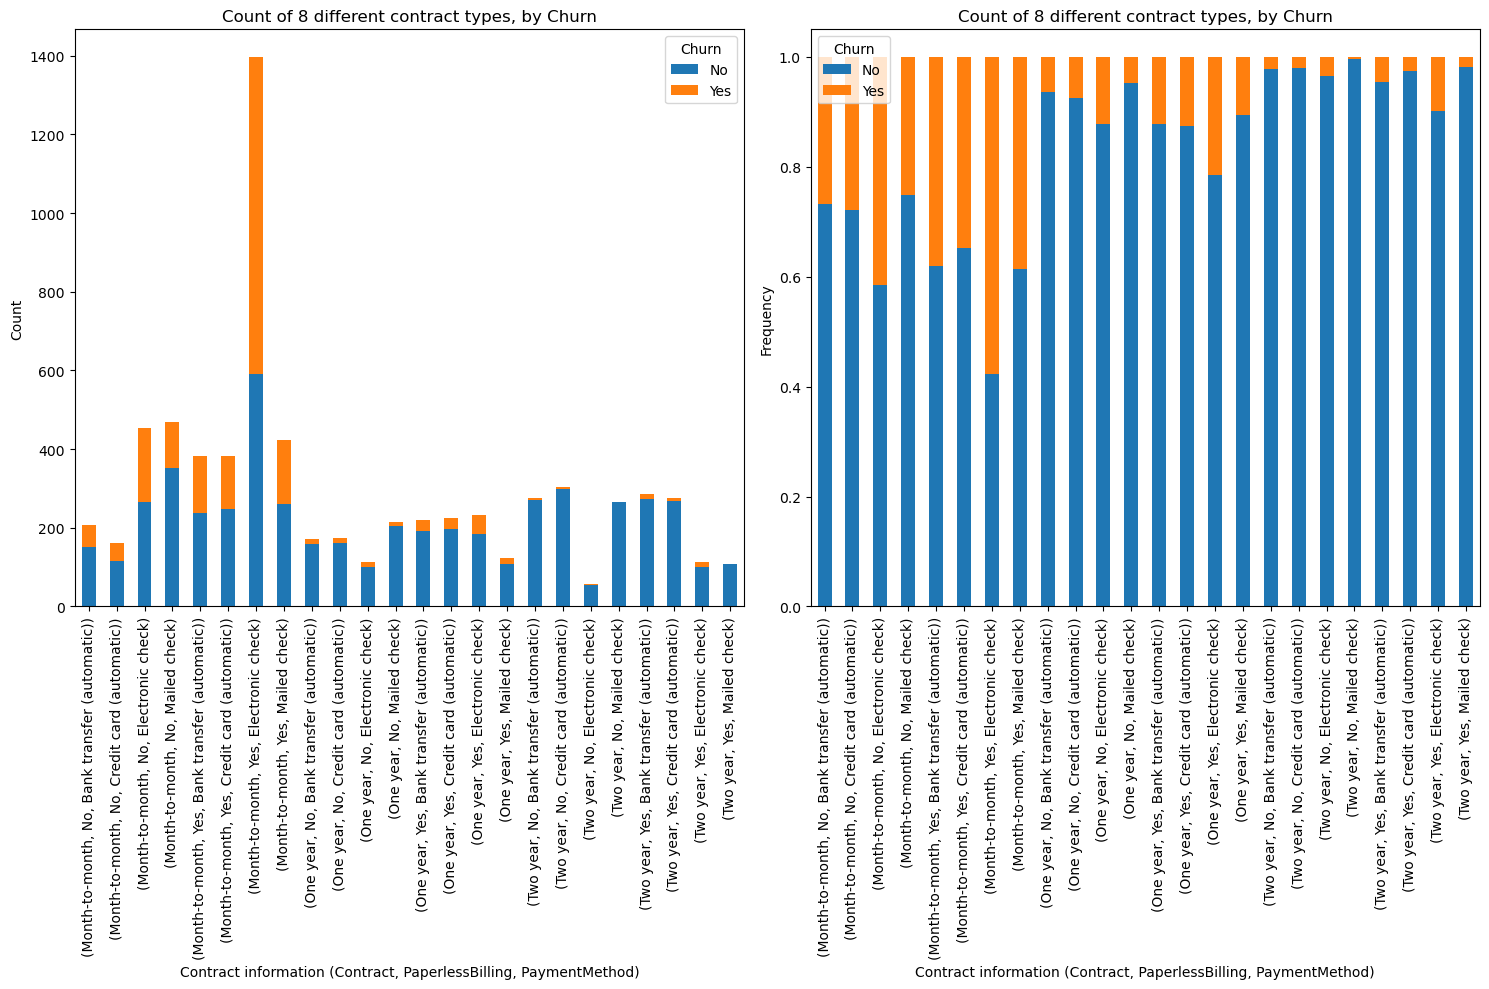

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

ax1 = data.groupby(["Contract", "PaperlessBilling", "PaymentMethod"])["Churn"].value_counts().unstack(level=3).plot(kind="bar", stacked=True, ax=axes[0])
ax1.set_xlabel("Contract information (Contract, PaperlessBilling, PaymentMethod)")
ax1.set_ylabel("Count")
ax1.set_title("Count of 8 different contract types, by Churn")

ax2 = data.groupby(["Contract", "PaperlessBilling", "PaymentMethod"])["Churn"].value_counts(normalize=True).unstack(level=3).plot(kind="bar", stacked=True, ax=axes[1])
ax2.set_xlabel("Contract information (Contract, PaperlessBilling, PaymentMethod)")
ax2.set_ylabel("Frequency")
ax2.set_title("Count of 8 different contract types, by Churn")

plt.tight_layout()
plt.show()

A spike occurs in the number of people with a **month-to-month** contract, agreeing to **paperless billing** and paying via **electronic checks**, at aroung **1400** customers, almost threefold the number of the second-highest group. They are also the group with the highest churn rate, at almost 60 percent. </br>
This may suggest an abundance of newcomers who only want to try out services instead of commiting themselves to a longer contract. </br>
Also in line with the univariate analysis, month-to-month contracts seem to produce the most churning customers.

## Service information

From the dataset description, two main types of services can be seen: **phone** service and **internet** service. Each type of service **entail** other services:
* Phone service offer
  * Multiple lines
* Internet service offers
  * Online security
  * Online backup
  * Device protection
  * Tech support
  * Streaming TV
  * Streaming movies

It is crucial to note that if either service (Phone or Internet) is **not** subscribed, the subservices are **defaulted** to "No", with an annotated "(No phone service)" or "(No Internet service)" to differentiate from other customers. This motivates the idea of splitting the dataset to different groups in order to clearly differentiate the types of services customers subscribe to.

In [50]:
print("Choices for Internet service:", data["InternetService"].unique().tolist())
print("Choices for Phone service:", data["PhoneService"].unique().tolist())
no_phone_no_internet_data = data[(data["PhoneService"] == "No") & (data["InternetService"] == "No")]
yes_phone_no_internet_data = data[(data["PhoneService"] != "No") & (data["InternetService"] == "No")]
no_phone_yes_internet_data = data[(data["PhoneService"] == "No") & (data["InternetService"] != "No")]
yes_phone_yes_internet_data = data[(data["PhoneService"] != "No") & (data["InternetService"] != "No")]


Choices for Internet service: ['DSL', 'Fiber optic', 'No']
Choices for Phone service: ['No', 'Yes']


In [51]:
print("Number of customers WITHOUT phone subscription and WITHOUT internet subscription:", no_phone_no_internet_data.shape[0])
print("Number of customers WITH phone subscription and WITHOUT internet subscription:", yes_phone_no_internet_data.shape[0])
print("Number of customers WITHOUT phone subscription and WITH internet subscription:", no_phone_yes_internet_data.shape[0])
print("Number of customers WITH phone subscription and WITH internet subscription:", yes_phone_yes_internet_data.shape[0])

Number of customers WITHOUT phone subscription and WITHOUT internet subscription: 0
Number of customers WITH phone subscription and WITHOUT internet subscription: 1520
Number of customers WITHOUT phone subscription and WITH internet subscription: 680
Number of customers WITH phone subscription and WITH internet subscription: 4832


A 0 for customers **without both services** is appropriate, since there are these two services available. The majority of customers subscribe to **both phone and Internet**. </br>
Also, phone service is more popular than Internet service (1520 vs. 680).

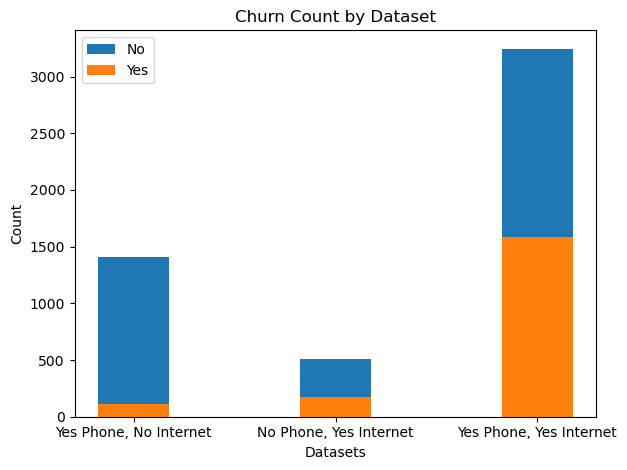

In [52]:
# Data
datasets = ['Yes Phone, No Internet', 'No Phone, Yes Internet', 'Yes Phone, Yes Internet']
churn_labels = ['No', 'Yes']
churn_counts = [
    [1407, 113],
    [510, 170],
    [3246, 1586]
]

# Set the positions of the bars on the x-axis
x = np.arange(len(datasets))
bar_width = 0.35

# Plotting
fig, ax = plt.subplots()

# Plotting the bars
for i in range(len(churn_labels)):
    ax.bar(x, [row[i] for row in churn_counts], bar_width, label=churn_labels[i])

# Adding labels and title
ax.set_ylabel('Count')
ax.set_xlabel('Datasets')
ax.set_title('Churn Count by Dataset')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()

plt.tight_layout()
plt.show()

The lowest churn rate occur in the group of customers who use the phone service but not the internet service, highest (nearly 50%) for the group with both services.</br>
This chart may suggest that the Internet subscription correlates to a higher churn rate, though the fact that churn is higher when both services are used is not explained.

### Subdataset processing

In [53]:
yes_phone_no_internet_data = yes_phone_no_internet_data.drop(["PhoneService", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"], axis=1)
yes_phone_no_internet_data.head()

gender  SeniorCitizen Partner Dependents  tenure MultipleLines  \
11    Male              0      No         No      16            No   
16  Female              0      No         No      52            No   
21    Male              0     Yes         No      12            No   
22    Male              0      No         No       1            No   
33    Male              0      No         No       1            No   

          Contract PaperlessBilling              PaymentMethod  \
11        Two year               No    Credit card (automatic)   
16        One year               No               Mailed check   
21        One year               No  Bank transfer (automatic)   
22  Month-to-month               No               Mailed check   
33  Month-to-month               No  Bank transfer (automatic)   

    MonthlyCharges  TotalCharges Churn  
11           18.95        326.80    No  
16           20.65       1022.95    No  
21           19.80        202.25    No  
22           20.15         20.15   Yes  
33           20.20         20.20    No

In [54]:
no_phone_yes_internet_data = no_phone_yes_internet_data.drop(["PhoneService", "InternetService", "MultipleLines"], axis=1)
no_phone_yes_internet_data.head()

gender  SeniorCitizen Partner Dependents  tenure OnlineSecurity  \
0   Female              0     Yes         No       1             No   
3     Male              0      No         No      45            Yes   
7   Female              0      No         No      10            Yes   
20    Male              1      No         No       1             No   
27    Male              0     Yes        Yes       1             No   

   OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0           Yes               No          No          No              No   
3            No              Yes         Yes          No              No   
7            No               No          No          No              No   
20           No              Yes          No          No             Yes   
27          Yes               No          No          No              No   

          Contract PaperlessBilling              PaymentMethod  \
0   Month-to-month              Yes           Electronic check   
3         One year               No  Bank transfer (automatic)   
7   Month-to-month               No               Mailed check   
20  Month-to-month              Yes           Electronic check   
27  Month-to-month               No           Electronic check   

    MonthlyCharges  TotalCharges Churn  
0            29.85         29.85    No  
3            42.30       1840.75    No  
7            29.75        301.90    No  
20           39.65         39.65   Yes  
27           30.20         30.20   Yes

In [55]:
yes_phone_yes_internet_data = yes_phone_yes_internet_data.drop(["PhoneService", "InternetService"], axis=1)
yes_phone_yes_internet_data.head()

gender  SeniorCitizen Partner Dependents  tenure MultipleLines  \
1    Male              0      No         No      34            No   
2    Male              0      No         No       2            No   
4  Female              0      No         No       2            No   
5  Female              0      No         No       8           Yes   
6    Male              0      No        Yes      22           Yes   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
4             No           No               No          No          No   
5             No           No              Yes          No         Yes   
6             No          Yes               No          No         Yes   

  StreamingMovies        Contract PaperlessBilling            PaymentMethod  \
1              No        One year               No             Mailed check   
2              No  Month-to-month              Yes             Mailed check   
4              No  Month-to-month              Yes         Electronic check   
5             Yes  Month-to-month              Yes         Electronic check   
6              No  Month-to-month              Yes  Credit card (automatic)   

   MonthlyCharges  TotalCharges Churn  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
4           70.70        151.65   Yes  
5           99.65        820.50   Yes  
6           89.10       1949.40    No

In [56]:
encoded_ypni_data = one_hot_encode(yes_phone_no_internet_data)
encoded_npyi_data = one_hot_encode(no_phone_yes_internet_data)
encoded_ypyi_data = one_hot_encode(yes_phone_yes_internet_data)

# ADVANCED EXPLORATORY ANALYSIS

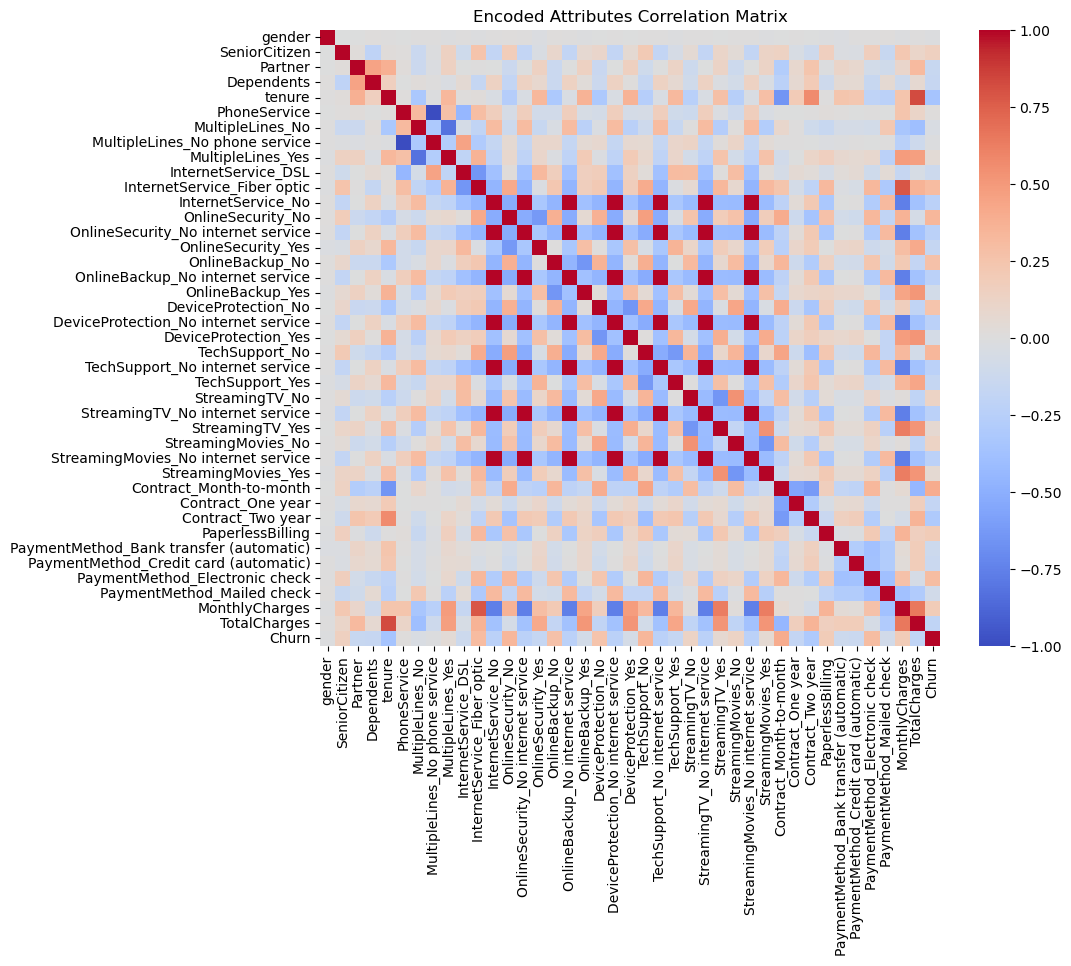

In [57]:
correlation_matrix = encoded_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Encoded Attributes Correlation Matrix')
plt.show()

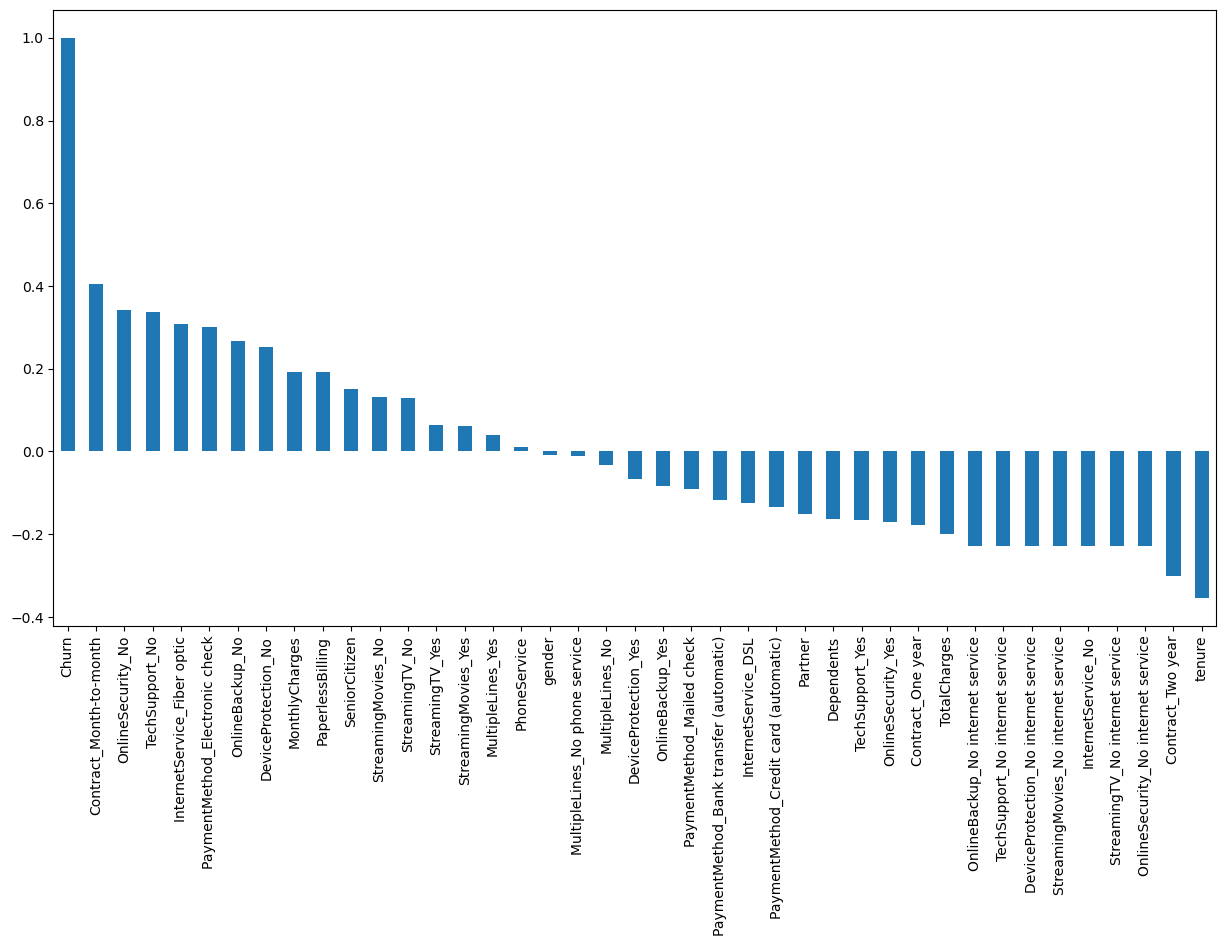

In [58]:
plt.figure(figsize=(15,8))
encoded_data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

## FEATURES SELECTION BY PREDICTING MODELS

In this section, our primary objective is to identify the most significant features and analyze their correlation with customer churn. To achieve this, we employ a predictive model that has demonstrated the highest accuracy in order to identify relevant attributes for our recommendations. <br>

The process consists of two main parts:
1. Feature Selection: We carefully select the optimal features to train our predictive models, ensuring that they contribute effectively to accurate predictions.
2. Final Feature Selection: From the pool of best-performing models, we make a careful selection of features and groups of features to conduct our in-depth analysis. This step will enable us to gain valuable insights into the factors influencing customer churn.

### Feature Selection for Predictive Models

In this crucial task, we will conduct a thorough examination of the correlation between features, encompassing both discrete and continuous variables, as well as categorical and numerical attributes. Our goal is to identify attributes that significantly impact customer churn while eliminating those that do not contribute meaningfully to the prediction process. By meticulously refining the feature set, we will retain only the most valuable attributes for training our predictive models, ensuring they possess the utmost relevance and accuracy for further analysis.

#### Numerical features removal

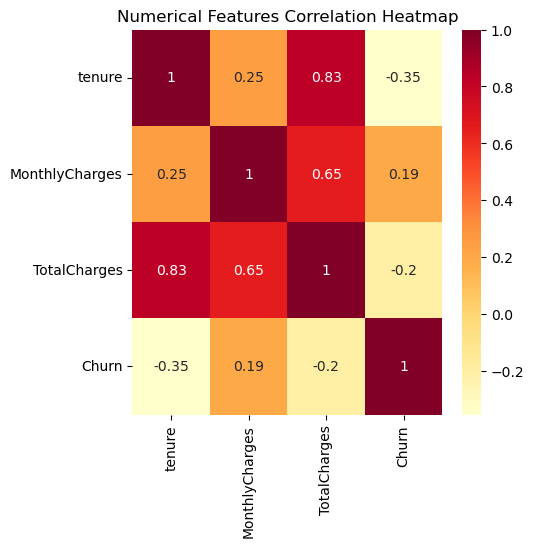

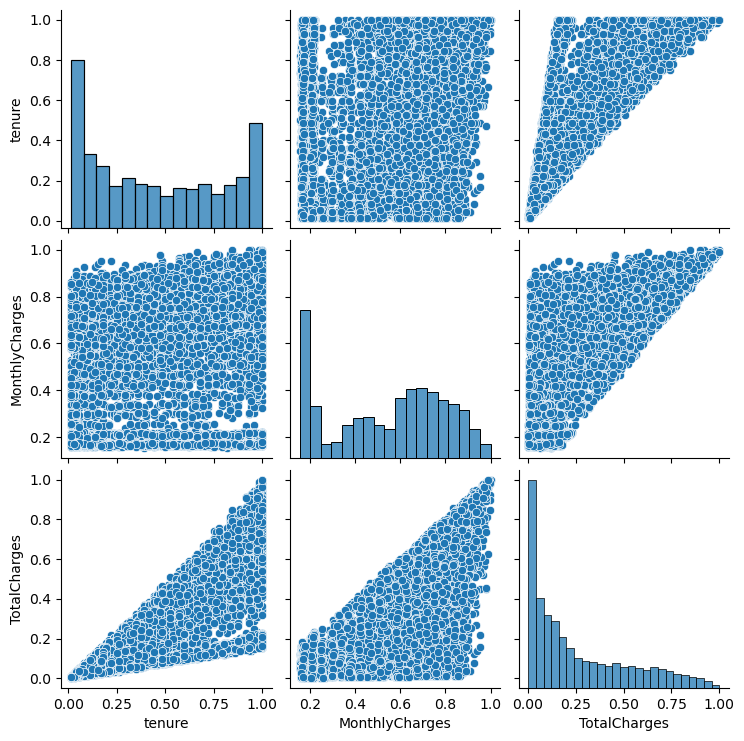

In [59]:
# plot the correlation matrix heatmap
plt.figure(figsize=(5, 5))
correlation_matrix = encoded_data[["tenure", "MonthlyCharges", "TotalCharges",'Churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title("Numerical Features Correlation Heatmap")
plt.show()
sns.pairplot(encoded_data[['tenure', 'MonthlyCharges', 'TotalCharges']])

As part of our feature selection process for customer churn analysis, we initially opted to exclude "total charges" due to its high correlation with the two remaining attributes. Instead, we focused on "monthly charges" as it provides valuable insights into service pricing during our analysis. However, upon further investigation, we noticed that when "total charges" is included in training the model, it remarkably improves the accuracy of predictions. This observation suggests that "total charges" inherently encapsulate not only "monthly charges" but also other additional fees, making it highly correlated with the churn rate. Therefore, we will reconsider our approach and include "total charges" as well as tenure and monthly charges in our predictive model to enhance its performance and better understand its impact on customer churn.

#### Categorical features removal

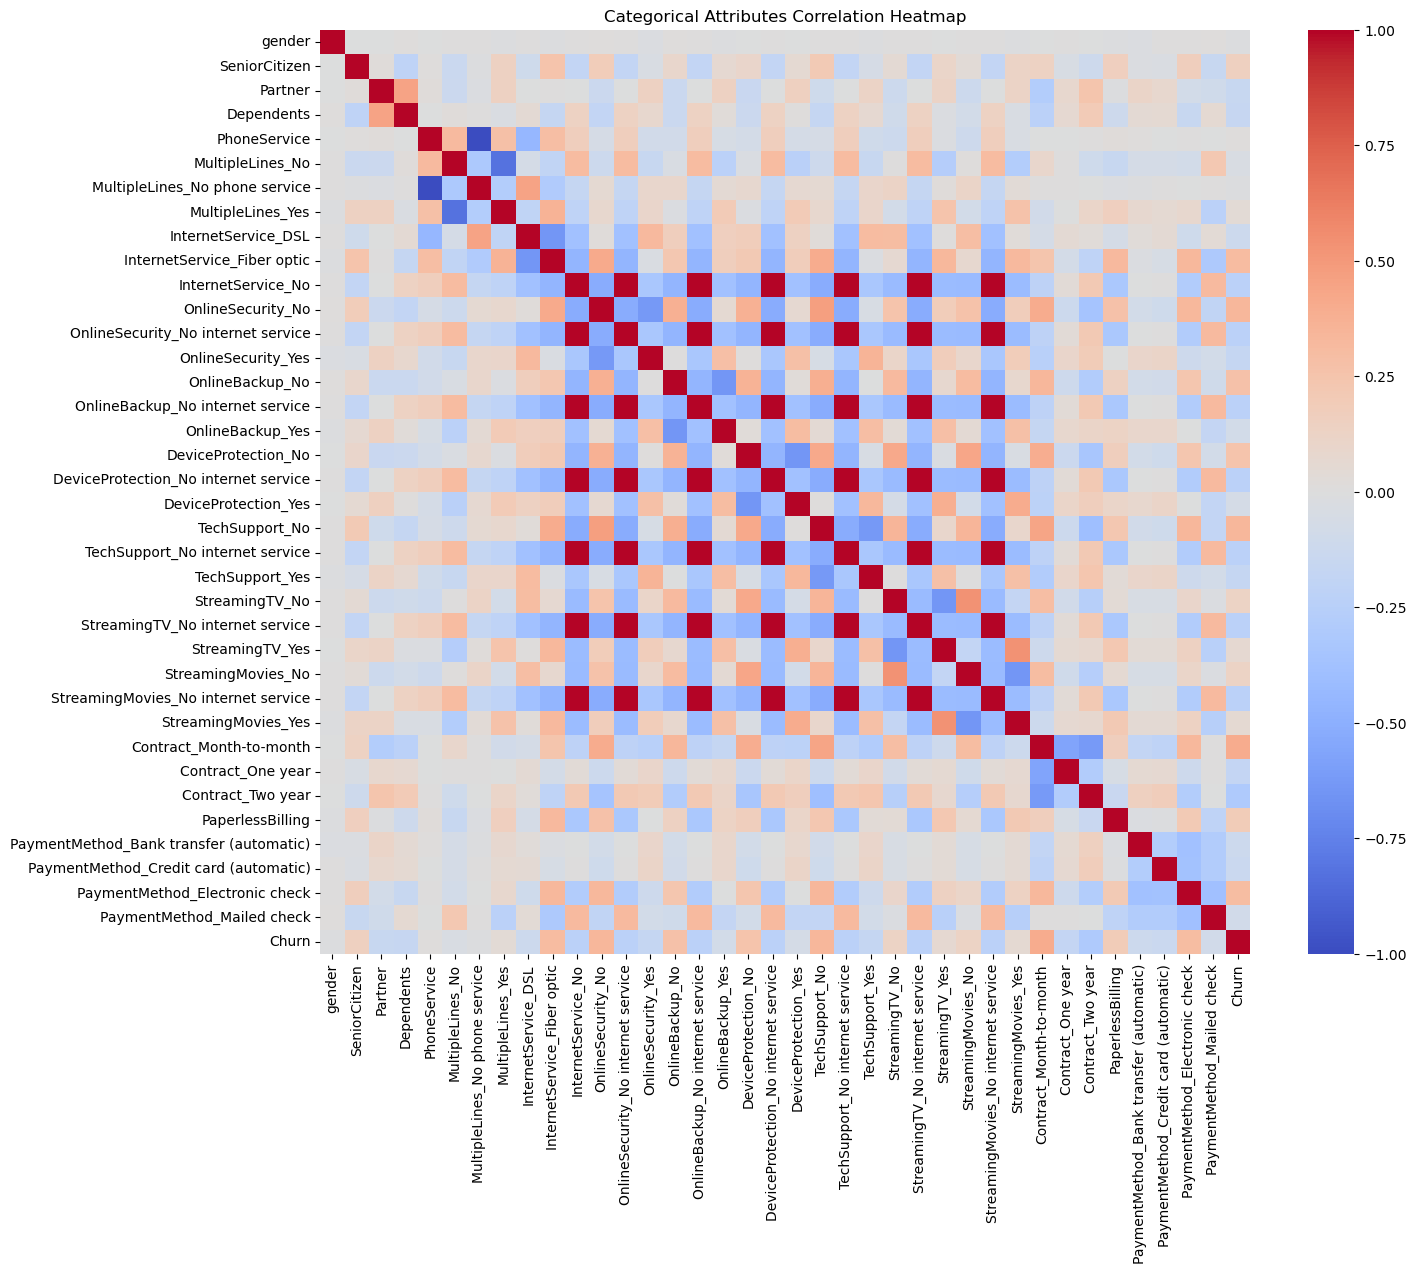

In [60]:
columns_to_exclude = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Select columns excluding the ones in 'columns_to_exclude'
selected_columns = encoded_data.drop(columns=columns_to_exclude)

# plot the correlation matrix heatmap
plt.figure(figsize=(15, 12))
correlation_matrix = selected_columns.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')  # Set the colormap to 'hot'
plt.title("Categorical Attributes Correlation Heatmap")
plt.show()

After analyzing the correlation matrix, we find that gender does not appear to have any influence on the churn rate, nor do the other attributes mentioned. Consequently, we will not consider gender as an important feature in our customer churn analysis.

Additionally, in cases where there is no internet service, the attributes 'TechSupport_No internet service,' 'StreamingTV_No internet service,' 'DeviceProtection_No internet service,' 'StreamingMovies_No internet service,' 'OnlineSecurity_No internet service,' and 'OnlineBackup_No internet service' become redundant and offer no valuable insights. As a result, we will exclude these attributes from our analysis.

Similar to the phone service, we will also disregard the attribute 'MultipleLines_No phone service' as it does not provide any meaningful contribution to the prediction of customer churn.

By excluding these irrelevant attributes, we can streamline our analysis and focus on the essential features that genuinely impact customer churn. This approach will lead to more accurate and insightful results, aiding us in understanding the factors driving customer attrition more effectively.

In [61]:
columns_to_exclude = ['gender','TechSupport_No internet service','StreamingTV_No internet service', 'DeviceProtection_No internet service',  'StreamingMovies_No internet service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service','MultipleLines_No phone service' ]

# Select columns excluding the ones in 'columns_to_exclude'
filtered_encoded_data = encoded_data.drop(columns=columns_to_exclude)

#### Ranking important features for training

As part of our customer churn analysis, we will employ a comprehensive approach to determine the importance of different attributes. We will utilize various statistical techniques such as chi-square, f-test, logistic regression, and random forest to rank all the features based on their relevance to predicting churn.

By subjecting the features to these multiple ranking methods, we can obtain a more robust assessment of their significance. To arrive at the final list of features for training our predictive model, we will take the average rank derived from these techniques. This approach will enable us to make informed decisions about which attributes have the most substantial impact on customer churn and create a well-rounded feature set for our model.

In [62]:
# Initialize lst to store the selected feature names for all functions
lst = []
# Assuming you have already filtered_encoded_data DataFrame with 'Churn' as the target variable
y = filtered_encoded_data["Churn"]
X = filtered_encoded_data.drop('Churn', axis=1)

##### Univariate Feature Selection

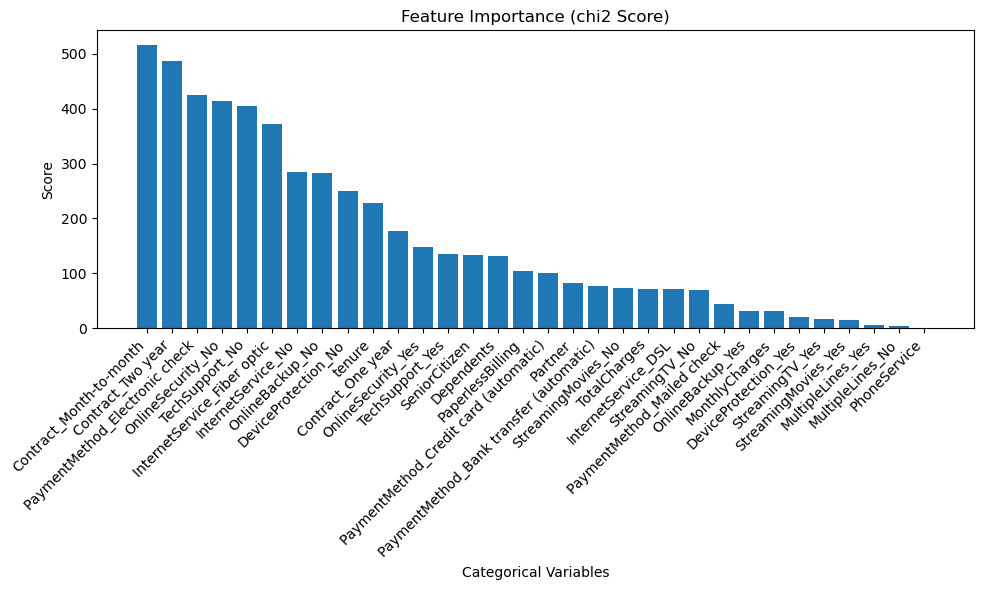

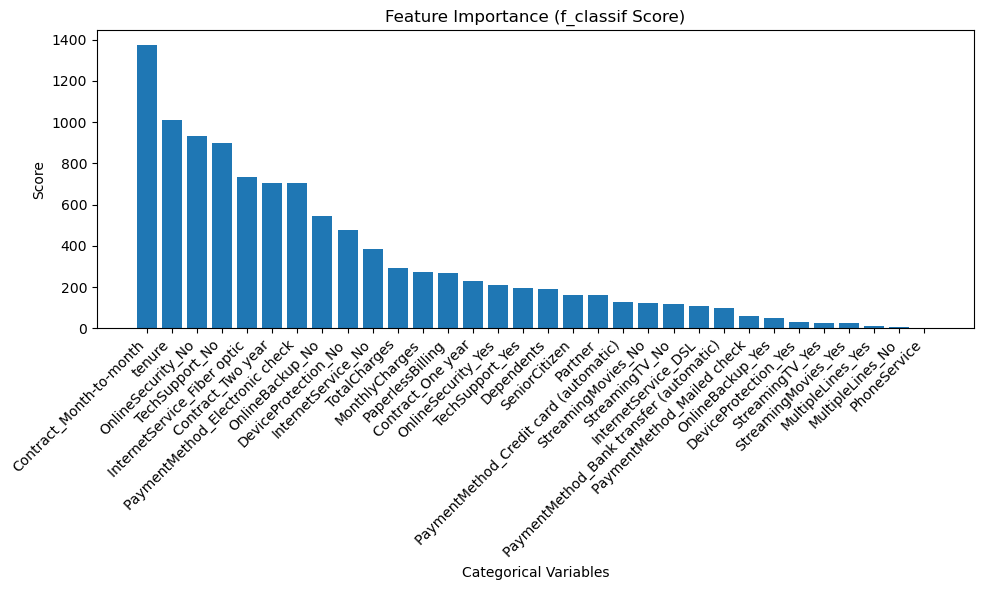

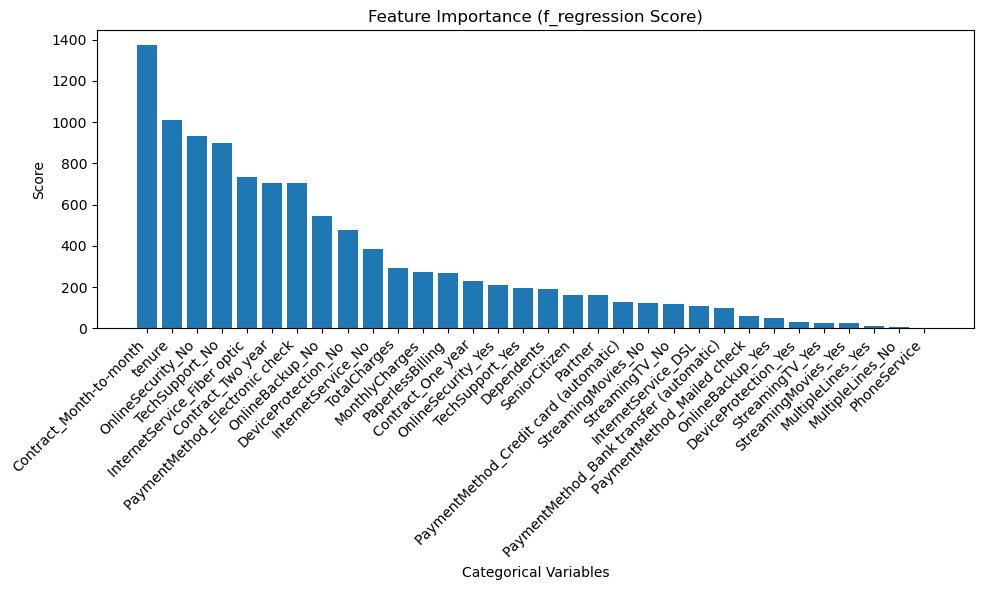

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile, chi2, f_classif, f_regression

# Keep the top 20% of features based on the F-test for classification
for func in [chi2, f_classif, f_regression]:
    selector = SelectPercentile(score_func=func, percentile=100)
    X_new = selector.fit_transform(X, y)

    # Get the selected feature indices
    selected_feature_indices = selector.get_support(indices=True)

    # Get the selected feature names
    selected_feature_names = X.columns[selected_feature_indices]

    # If you want to sort the selected features by their importance scores (F-test scores):
    selected_feature_scores = selector.scores_[selected_feature_indices]
    sorted_indices = selected_feature_scores.argsort()[::-1]
    selected_feature_names = selected_feature_names[sorted_indices]
    selected_feature_scores = selected_feature_scores[sorted_indices]
    lst.append(selected_feature_names.tolist())

    # Plotting the feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(selected_feature_names, selected_feature_scores)
    plt.title(f'Feature Importance ({func.__name__} Score)')
    plt.xlabel('Categorical Variables')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')  # Rotate the labels and align them to the right
    plt.tight_layout()  # Adjust the spacing to prevent overlapping
    plt.show()


##### Logistic Regression For Selection

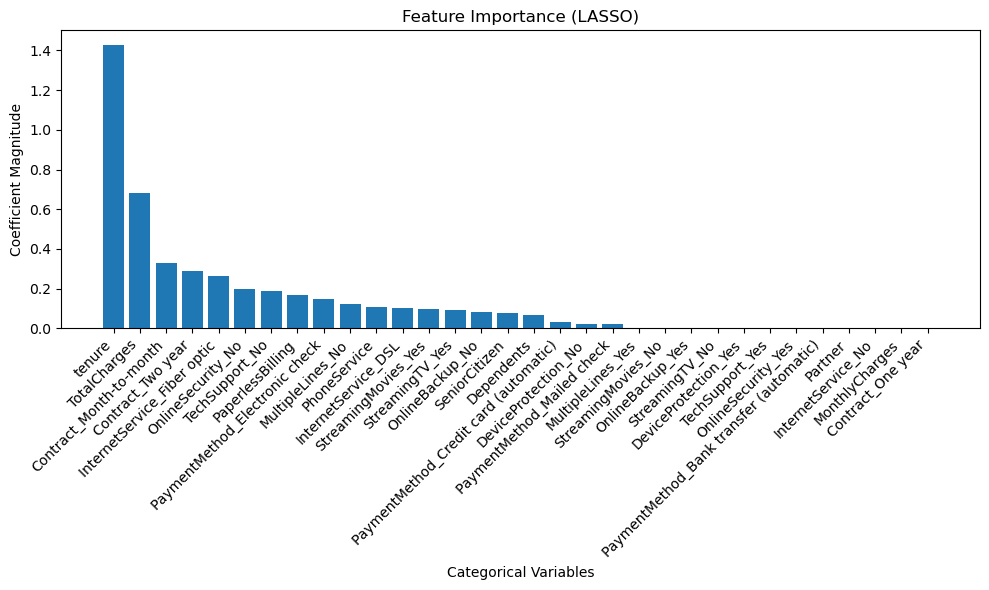

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for regularization methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.transform(X_test)

# Create a Lasso Logistic Regression model with alpha (regularization strength)
lasso_model = LogisticRegression(solver="liblinear", penalty="l1", C =1, random_state = 42)

# Fit the model to the training data
lasso_model.fit(X_train_scaled, y)

# Get the coefficients of the features after fitting the model
feature_importance = np.abs(lasso_model.coef_[0])

# Convert the feature importance scores to a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance (LASSO)')
plt.xlabel('Categorical Variables')
plt.ylabel('Coefficient Magnitude')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Select the important features based on non-zero coefficients
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0]['Feature']

lst.append(feature_importance_df['Feature'].tolist())


##### Random Forest For Selection

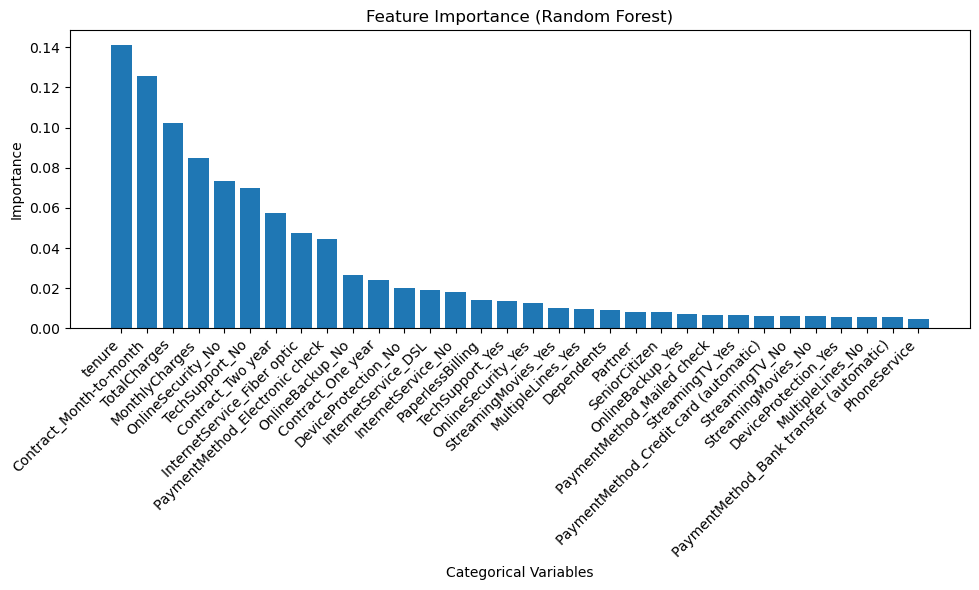

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=80, criterion='entropy', max_depth=30, max_leaf_nodes=50, ccp_alpha=0.0001,
                            bootstrap=True, oob_score=True, max_samples=0.25, random_state=42)

# Fit the model to the training data
clf.fit(X, y)

# Get the feature importance scores
feature_importance = clf.feature_importances_

# Create a DataFrame to store the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Categorical Variables')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
selected = feature_importance_df['Feature']
lst.append(selected.tolist())


In [66]:
rank = []
X = filtered_encoded_data.drop('Churn', axis=1)
for feature in X.columns.tolist():
    average_index = (lst[0].index(feature) + lst[1].index(feature) + lst[2].index(feature) +
                     lst[3].index(feature) + lst[4].index(feature)) / 5
    rank.append((feature, average_index))

sorted_rank = sorted(rank, key=lambda x: x[1], reverse=False)

def column_in(lst, limit):
  return [i[0] for i in sorted_rank[:limit]]


### Training models with appropriate number of features

Our approach involves fine-tuning various models to select the best hyperparameters using the top 18 features from the sorted ranked list. Afterward, we will systematically vary the number of features to determine the configuration that yields the highest accuracy for each model.

To achieve this, we will experiment with several models, including Support Vector Machine, K-nearest neighbors, Bernoulli Naive Bayes, Random Forest, and Logistic Regression. For each model, we will identify the set of important features that result in the highest accuracy during our evaluation.

Ultimately, we will choose the best-performing models based on their accuracy, along with the corresponding number of important features, to form a well-optimized and effective predictive model for customer churn analysis.

In [119]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
RANDOM_STATE = 14


In [144]:
column_inclu = column_in(lst,19)
print(column_inclu)
demographic = ['SeniorCitizen','Dependents','Partner']
contract = ['Contract_Month-to-month','Contract_Two year','Contract_One year','tenure','TotalCharges','MonthlyCharges','PaperlessBilling', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check']
service = ['OnlineSecurity_No','TechSupport_No','InternetService_Fiber optic','OnlineBackup_No','DeviceProtection_No','InternetService_No','TechSupport_Yes','OnlineSecurity_Yes']
setA = set(demographic + contract + service)
setB = set(column_inclu)
print(setA-setB)

['Contract_Month-to-month', 'tenure', 'OnlineSecurity_No', 'Contract_Two year', 'TechSupport_No', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'TotalCharges', 'OnlineBackup_No', 'DeviceProtection_No', 'PaperlessBilling', 'InternetService_No', 'Contract_One year', 'MonthlyCharges', 'Dependents', 'OnlineSecurity_Yes', 'TechSupport_Yes', 'SeniorCitizen', 'InternetService_DSL']
{'PaymentMethod_Credit card (automatic)', 'Partner'}


#### Support Vector Machine

In [136]:
#SVM_PARAM_GRID = {
#    'C': [0.01, 0.03, 0.1, 0.3, 1, 3],
#    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
column_included = column_in(lst,18)
y = encoded_data["Churn"]
X = encoded_data[column_included]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
svm = SVC(C=0.03, kernel='linear', probability=True, random_state=RANDOM_STATE)

svm.fit(X_train, y_train)
print("Test accuracy score:", svm.score(X_test, y_test))

Test accuracy score: 0.814498933901919


In [138]:
svm_acc = []
for index in range(32, 10, -1):
    column = column_in(lst, index)
    y = encoded_data["Churn"]
    X = encoded_data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

    svm = SVC(C=0.03, kernel='linear', probability=True, random_state=RANDOM_STATE)
    svm.fit(X_train, y_train)
    svm_acc.append(svm.score(X_test, y_test))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


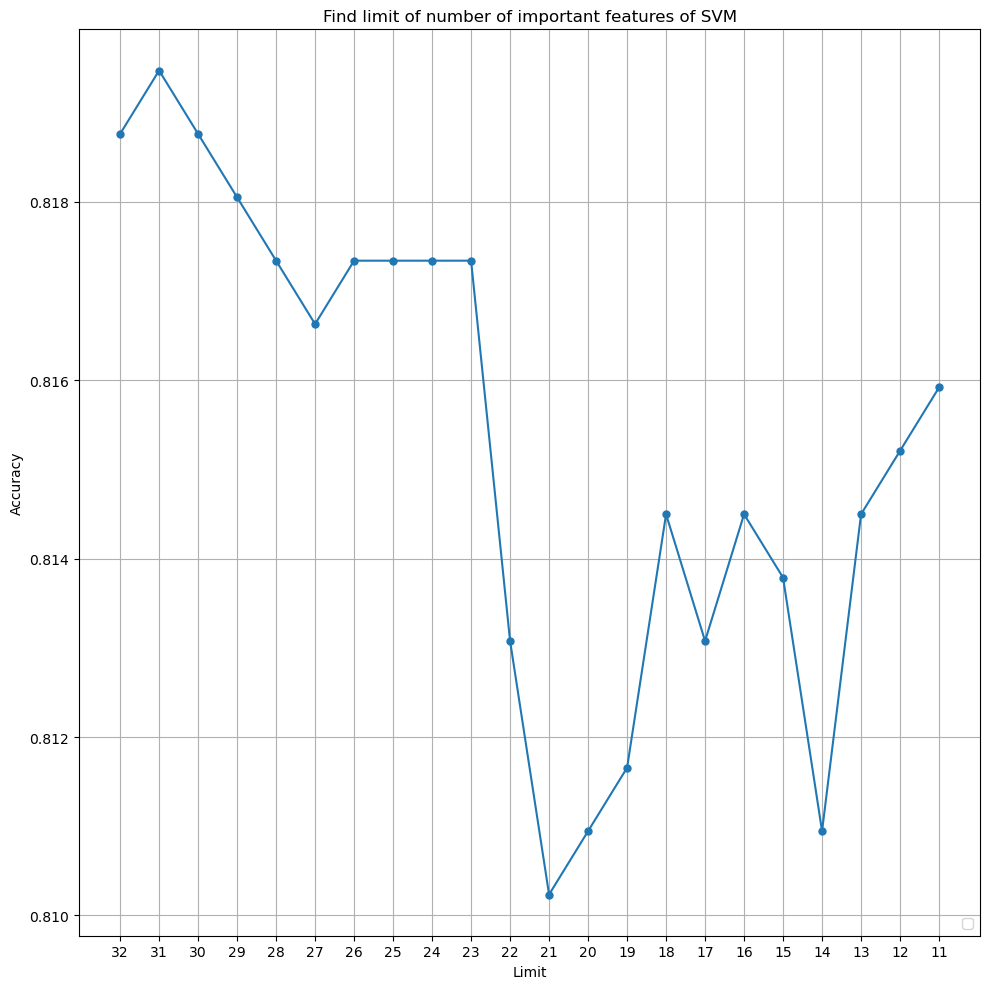

In [139]:
x= [str(i) for i in range(32,10,-1)]
y = svm_acc
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, marker='o', markersize=5, linewidth=1.5)

# Customize plot
ax.set_xlabel('Limit')
ax.set_ylabel('Accuracy')
ax.set_title('Find limit of number of important features of SVM')
ax.legend(loc='lower right')
ax.grid(True)

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()

#### K-Nearest Neighbors

In [121]:
#KNN_PARAM_GRID = [
#    {
#        'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
#        'weights': ['uniform', 'distance'],
#        'metric': ['cityblock', 'cosine', 'euclidean']
#    },
#    {
#        'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
#        'weights': ['uniform', 'distance'],
#        'p': [1, 2, 3, 4, 5],
#        'metric': ['minkowski']
#    }
#]
column_included = column_in(lst,18)
y = encoded_data["Churn"]
X = encoded_data[column_included]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

knn = KNeighborsClassifier(n_neighbors=11, weights='uniform', metric='cityblock')

knn.fit(X_train, y_train)
print("Test accuracy score:", knn.score(X_test, y_test))


Test accuracy score: 0.7882018479033405


#### Bernoulli Naive Bayes

In [122]:
column_included = column_in(lst,18)
y = encoded_data["Churn"]
X = encoded_data[column_included]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
bnb = BernoulliNB()

bnb.fit(X_train, y_train)
print("Test accuracy score:", bnb.score(X_test, y_test))


Test accuracy score: 0.7540867093105899


#### Random Forest

In [147]:
from sklearn.model_selection import GridSearchCV
RF_PARAM_GRID = [
   {
       'n_estimators': [50, 75, 100, 125],
       'criterion': ["entropy"],
       'max_depth': [20, 40, 60],
       'max_leaf_nodes': [50, 75, 100],
       'ccp_alpha': [0.003, 0.01, 0.03],
       'bootstrap': [False],
   },
   {
       'n_estimators': [50, 75, 100, 125],
       'criterion': ["entropy"],
       'max_depth': [20, 40, 60],
       'max_leaf_nodes': [50, 75, 100],
       'ccp_alpha': [0.003, 0.01, 0.03],
       'bootstrap': [True],
       'oob_score': [True, False],
       'max_samples': [0.25, 0.5, 0.75, 1]
   }
]
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
rf_gs = GridSearchCV(random_forest, param_grid=RF_PARAM_GRID, scoring='accuracy', cv=5)

rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [False],
                          'ccp_alpha': [0.003, 0.01, 0.03],
                          'criterion': ['entropy'], 'max_depth': [20, 40, 60],
                          'max_leaf_nodes': [50, 75, 100],
                          'n_estimators': [50, 75, 100, 125]},
                         {'bootstrap': [True], 'ccp_alpha': [0.003, 0.01, 0.03],
                          'criterion': ['entropy'], 'max_depth': [20, 40, 60],
                          'max_leaf_nodes': [50, 75, 100],
                          'max_samples': [0.25, 0.5, 0.75, 1],
                          'n_estimators': [50, 75, 100, 125],
                          'oob_score': [True, False]}],
             scoring='accuracy')

In [148]:
print("Best params:", rf_gs.best_params_)
print("Best cross valdation accuracy score:", rf_gs.best_score_)
print("Test accuracy score:", rf_gs.best_estimator_.score(X_test, y_test))

Best params: {'bootstrap': True, 'ccp_alpha': 0.003, 'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': 50, 'max_samples': 0.5, 'n_estimators': 125, 'oob_score': True}
Best cross valdation accuracy score: 0.8
Test accuracy score: 0.7967306325515281


In [141]:
column_included = column_in(lst,18)
y = encoded_data["Churn"]
X = encoded_data[column_included]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
rf = RandomForestClassifier(bootstrap=  True, ccp_alpha= 0.003, criterion='entropy', max_depth= 20, max_leaf_nodes= 50, max_samples= 0.5, n_estimators= 125, oob_score= True, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
print("Test accuracy score:", rf.score(X_test, y_test))


Test accuracy score: 0.8059701492537313


In [99]:
#Compute average accuracy
column_included = column_in(lst,18)
y = encoded_data["Churn"]
X = encoded_data[column_included]
sum = 0
for i in range(1,101):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
  rf = RandomForestClassifier(bootstrap=  True, ccp_alpha= 0.003, criterion='entropy', max_depth= 20, max_leaf_nodes= 50, max_samples= 0.5, n_estimators= 125, oob_score= True, random_state=i)
  rf.fit(X_train, y_train)
# print("Test accuracy score:", rf.score(X_test, y_test))
  sum+= rf.score(X_test, y_test)



In [105]:
print(sum/100)

0.7978180525941717


In [96]:
rf_acc = []
for index in range(32, 10, -1):
    column = column_in(lst, index)
    y = encoded_data["Churn"]
    X = encoded_data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

    rf = RandomForestClassifier(bootstrap=  True, ccp_alpha= 0.003, criterion='entropy', max_depth= 20, max_leaf_nodes= 50, max_samples= 0.5, n_estimators= 125, oob_score= True, random_state= RANDOM_STATE)
    rf.fit(X_train, y_train)
    rf_acc.append(rf.score(X_test, y_test))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


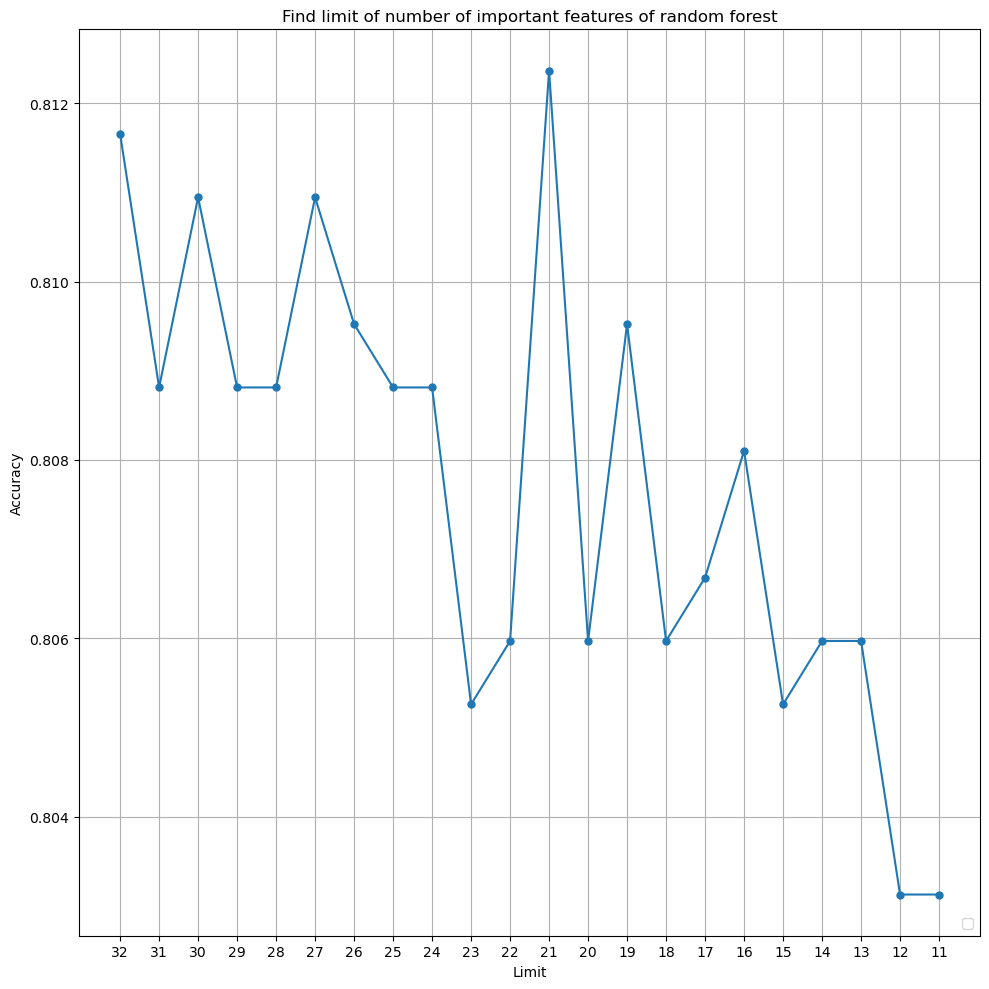

In [97]:
x= [str(i) for i in range(32,10,-1)]
y = rf_acc
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, marker='o', markersize=5, linewidth=1.5)

# Customize plot
ax.set_xlabel('Limit')
ax.set_ylabel('Accuracy')
ax.set_title('Find limit of number of important features of random forest')
ax.legend(loc='lower right')
ax.grid(True)

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()

#### Logistic Regression

In [110]:
from sklearn.model_selection import GridSearchCV
LOGREG_PARAM_GRID = {
    "C": [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
}

logreg_gs = GridSearchCV(LogisticRegression(solver="liblinear", penalty="l1", random_state=RANDOM_STATE), param_grid=LOGREG_PARAM_GRID, scoring="accuracy", cv=5)

logreg_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', random_state=14,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10,
                               30]},
             scoring='accuracy')

In [111]:
print("Best params:", logreg_gs.best_params_)
print("Best cross valdation accuracy score:", logreg_gs.best_score_)
print("Test accuracy score:", logreg_gs.best_estimator_.score(X_test, y_test))

Best params: {'C': 30}
Best cross valdation accuracy score: 0.796088888888889
Test accuracy score: 0.8166311300639659


In [117]:
#Compute Average Accuracy
column_included = column_in(lst,18)
y = encoded_data["Churn"]
X = encoded_data[column_included]
sumlg = 0
for i in range(1,101):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
  lg = LogisticRegression(solver="liblinear", penalty="l1", C =30, max_iter = 400, random_state = RANDOM_STATE)
  lg.fit(X_train, y_train)
  sumlg+= lg.score(X_test, y_test)

In [123]:
print(sumlg)

80.19474058280032


In [125]:
column_included = column_in(lst,18)
y = encoded_data["Churn"]
X = encoded_data[column_included]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
lg = LogisticRegression(solver="liblinear", penalty="l1", C =30, max_iter = 400, random_state = RANDOM_STATE)
lg.fit(X_train, y_train)
print("Test accuracy score:", lg.score(X_test, y_test))

Test accuracy score: 0.8180525941719972


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

lg_acc = []
for index in range(32, 10, -1):
    column = column_in(lst, index)
    y = encoded_data["Churn"]
    X = encoded_data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

    lg = LogisticRegression(solver="liblinear", penalty="l1", C=30, max_iter=400, random_state=RANDOM_STATE)

    lg.fit(X_train, y_train)
    lg_acc.append(lg.score(X_test, y_test))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


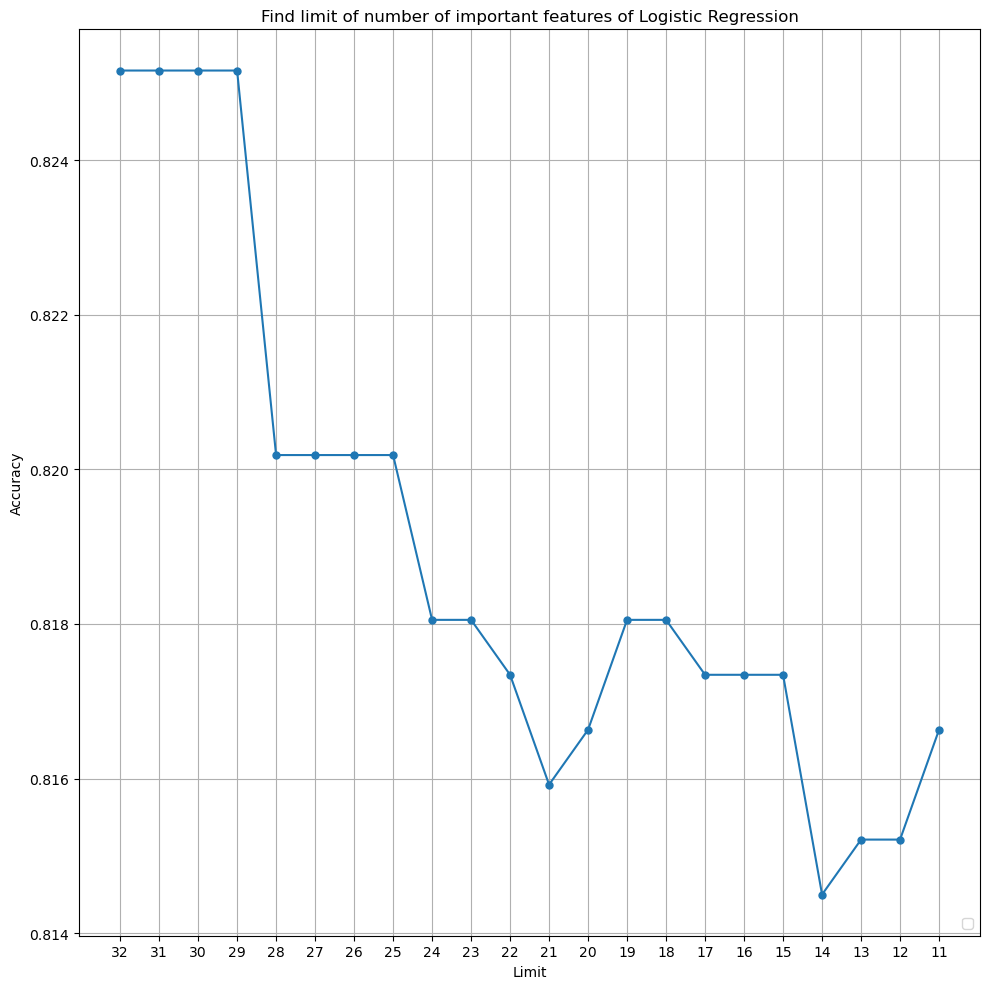

In [142]:
x= [str(i) for i in range(32,10,-1)]
y = lg_acc
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, marker='o', markersize=5, linewidth=1.5)

# Customize plot
ax.set_xlabel('Limit')
ax.set_ylabel('Accuracy')
ax.set_title('Find limit of number of important features of Logistic Regression')
ax.legend(loc='lower right')
ax.grid(True)

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()

#### Conclusion

The test results show that the Logistic Regression model produces the highest result, closely followed by the Random Forest model and Support Vector Machine. All test accuracy scores are capped at around 0.8, possibly suggesting a limit to prediction capabilities in the problem.
With K-Nearest Neighbours and Benoulli Naive Bayes, the performance is markerablly lower than three previous models

After conducting extensive testing of different models with varying numbers of features, we have observed that logistic regression yields the highest accuracy when utilizing a minimum of 29 features from the sorted rank. Evidently, increasing the number of features improves performance, but our focus is on identifying attributes that directly impact the churn rate. We aim to strike a balance between accuracy and simplicity by considering only the most influential features to avoid providing incorrect recommendations and to save time during real-life testing.

To facilitate a more in-depth analysis, we intend to limit our selection to approximately 18-19 of the best attributes. This approach will enable us to gain deeper insights into the factors that significantly influence customer churn while maintaining a manageable and interpretable model. By prioritizing the most important attributes, we can ensure the accuracy of our analysis and make more informed decisions in real-world scenarios.

Here are importance attributes divided into 3 groups: demographic, contract, service:
1. Demographic: SeniorCitizen, Dependents
2. Contract: Contract_Month-to-month, Contract_Two year, Contract_One year, tenure, TotalCharges , MonthlyCharges, PaperlessBilling, PaymentMethod_Electronic check
3. Service: OnlineSecurity_No, TechSupport_No , InternetService_Fiber optic, OnlineBackup_No, DeviceProtection_No, InternetService_No, TechSupport_Yes , OnlineSecurity_Yes


### Advanced Analysis

#### Correlation of features

Correlation of final attributes with churn

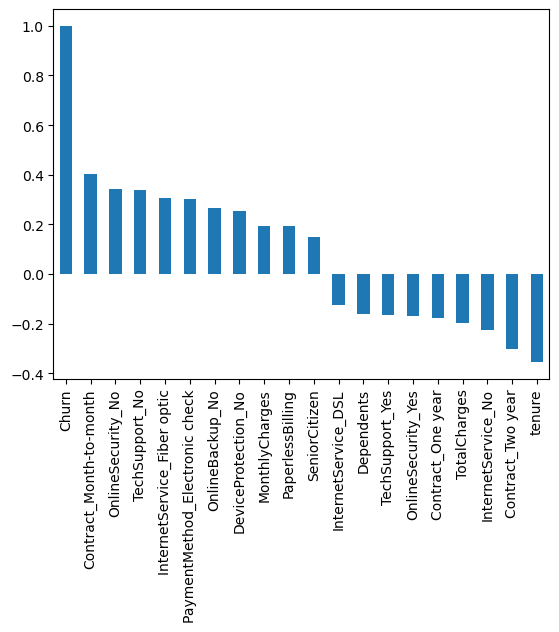

In [146]:
# Get the feature names of the top 24 features
selected_columns = column_in(lst, 19) + ['Churn']

# Select the relevant columns and calculate the correlation with 'Churn'
correlation_data = encoded_data[selected_columns].corr()['Churn'].sort_values(ascending=False)#'TechSupport_No internet service','StreamingTV_No internet service', 'DeviceProtection_No internet service',  'StreamingMovies_No internet service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',

# Plot the correlation values
correlation_data.plot(kind='bar')
plt.show()

Several factors significantly impact the churn rate, including having a month-to-month contract, lacking security, tech support, online backup, and device protection. On the other hand, subscribing to tech support, online security, DSL internet service, having an internet service or contract for 1-2 years can reduce the churn rate. It is essential to recognize that these factors are not independent of each other; rather, there exists a relationship among them, indicating that certain underlying reasons contribute to customer churn. We need to delve deeper into these relationships to uncover the root causes behind customer churn and gain valuable insights for effective retention strategies.

Correlation among attributes

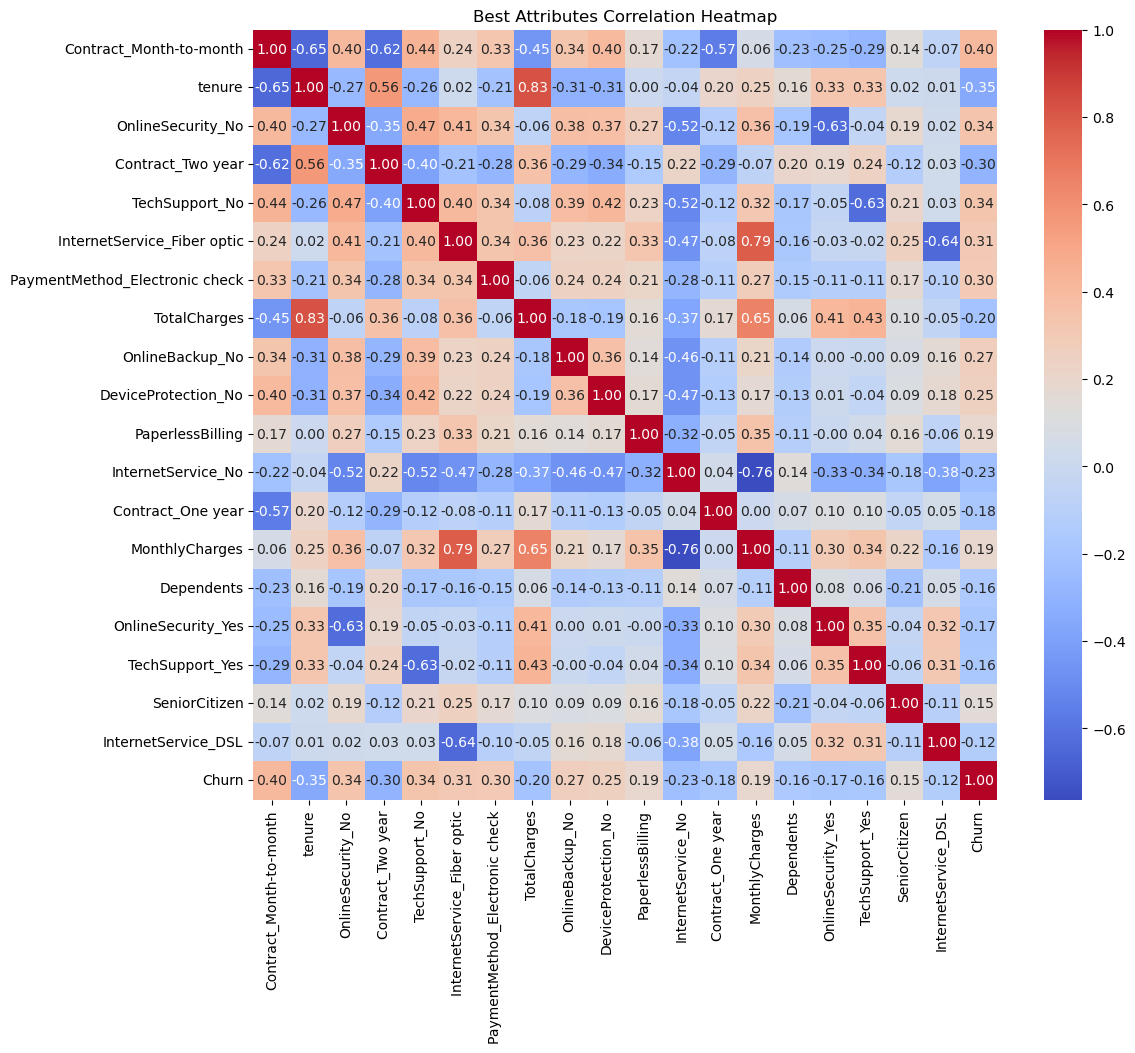

In [149]:
plt.figure(figsize=(12, 10))
correlation_matrix = encoded_data[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt ='.2f') 
plt.title("Best Attributes Correlation Heatmap")
plt.show()

To provide targeted recommendations for each customer segment, we will augment the analysis by including additional attributes within similar categories. For instance, in the demographic category, we will incorporate attributes like "partner" to enhance our considerations. Similarly, when examining the payment method, we will compare various options such as Credit Card and Mailed Check. This approach will enable us to offer more specific and meaningful suggestions tailored to the unique characteristics of each customer segment, facilitating more effective decision-making and ultimately reducing customer churn.

#### Customer Churn in Relation to Demographic

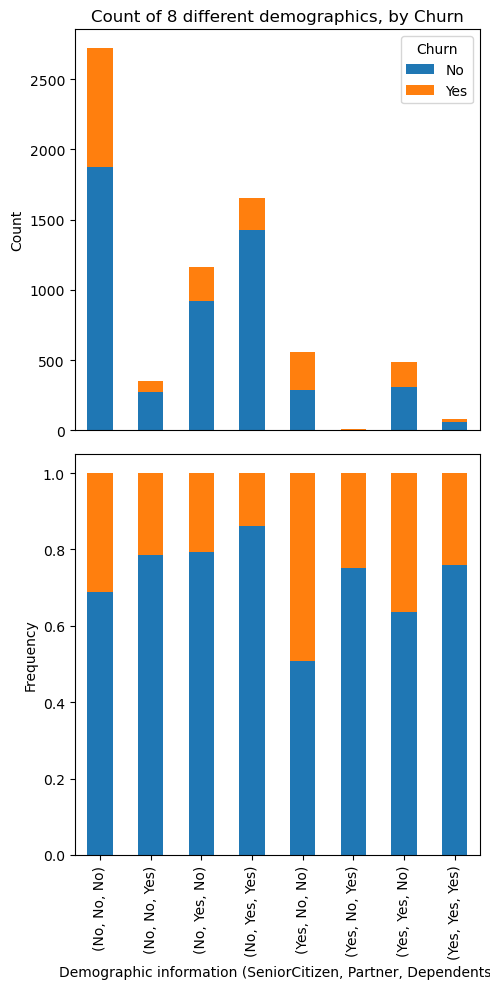

In [174]:
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame containing the required data.

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))

# Plotting the first figure
ax1 = data.groupby(["SeniorCitizen", "Partner", "Dependents"])["Churn"].value_counts().unstack(level=3).plot(kind="bar", stacked=True, ax=axes[0])
ax1.set_xlabel("")  # Remove the x-label
ax1.set_ylabel("Count")
ax1.set_title("Count of 8 different demographics, by Churn")

# Plotting the second figure
ax2 = data.groupby(["SeniorCitizen", "Partner", "Dependents"])["Churn"].value_counts(normalize=True).unstack(level=3).plot(kind="bar", stacked=True, ax=axes[1], legend=False)
ax2.set_xlabel("Demographic information (SeniorCitizen, Partner, Dependents)")
ax2.set_ylabel("Frequency")

# Remove x-ticks for the first figure (axes[0])
ax1.set_xticks([])

# Adjusting layout to avoid overlapping titles
plt.tight_layout()

# Display the figures
plt.show()


Indeed, senior citizens who are single and not dependent on anyone tend to subscribe the most, but they also exhibit a higher churn rate. This observation highlights the need to prioritize these particular customers and implement strategies to retain them effectively. Additionally, we noticed that senior customers without dependents also experience a higher churn rate, although they may not contribute significantly to revenue. Despite this, it remains essential to consider them in our analysis to understand the factors influencing churn.

Regrettably, only a small number of customers fall into the category of senior citizens without partners but having dependents who use our services. This situation prompts us to delve deeper into understanding the reasons behind their low usage. It is crucial to investigate whether their life circumstances, hobbies, work-related requirements, or network limitations are influencing their service adoption patterns. By exploring these aspects, we can gain valuable insights that will help us cater better to their needs and potentially encourage increased usage of our services among this specific customer group.

It is important to acknowledge that our current focus is primarily on identifying service-related problems that impact churn. While demographic factors like being a senior, having a partner, or dependents can provide some insights, they might not provide a comprehensive understanding of the root causes behind churn. To predict churn more accurately, we must be cautious about assuming reasons solely based on demographic information.

#### Customer Churn in Relation to Contract Type

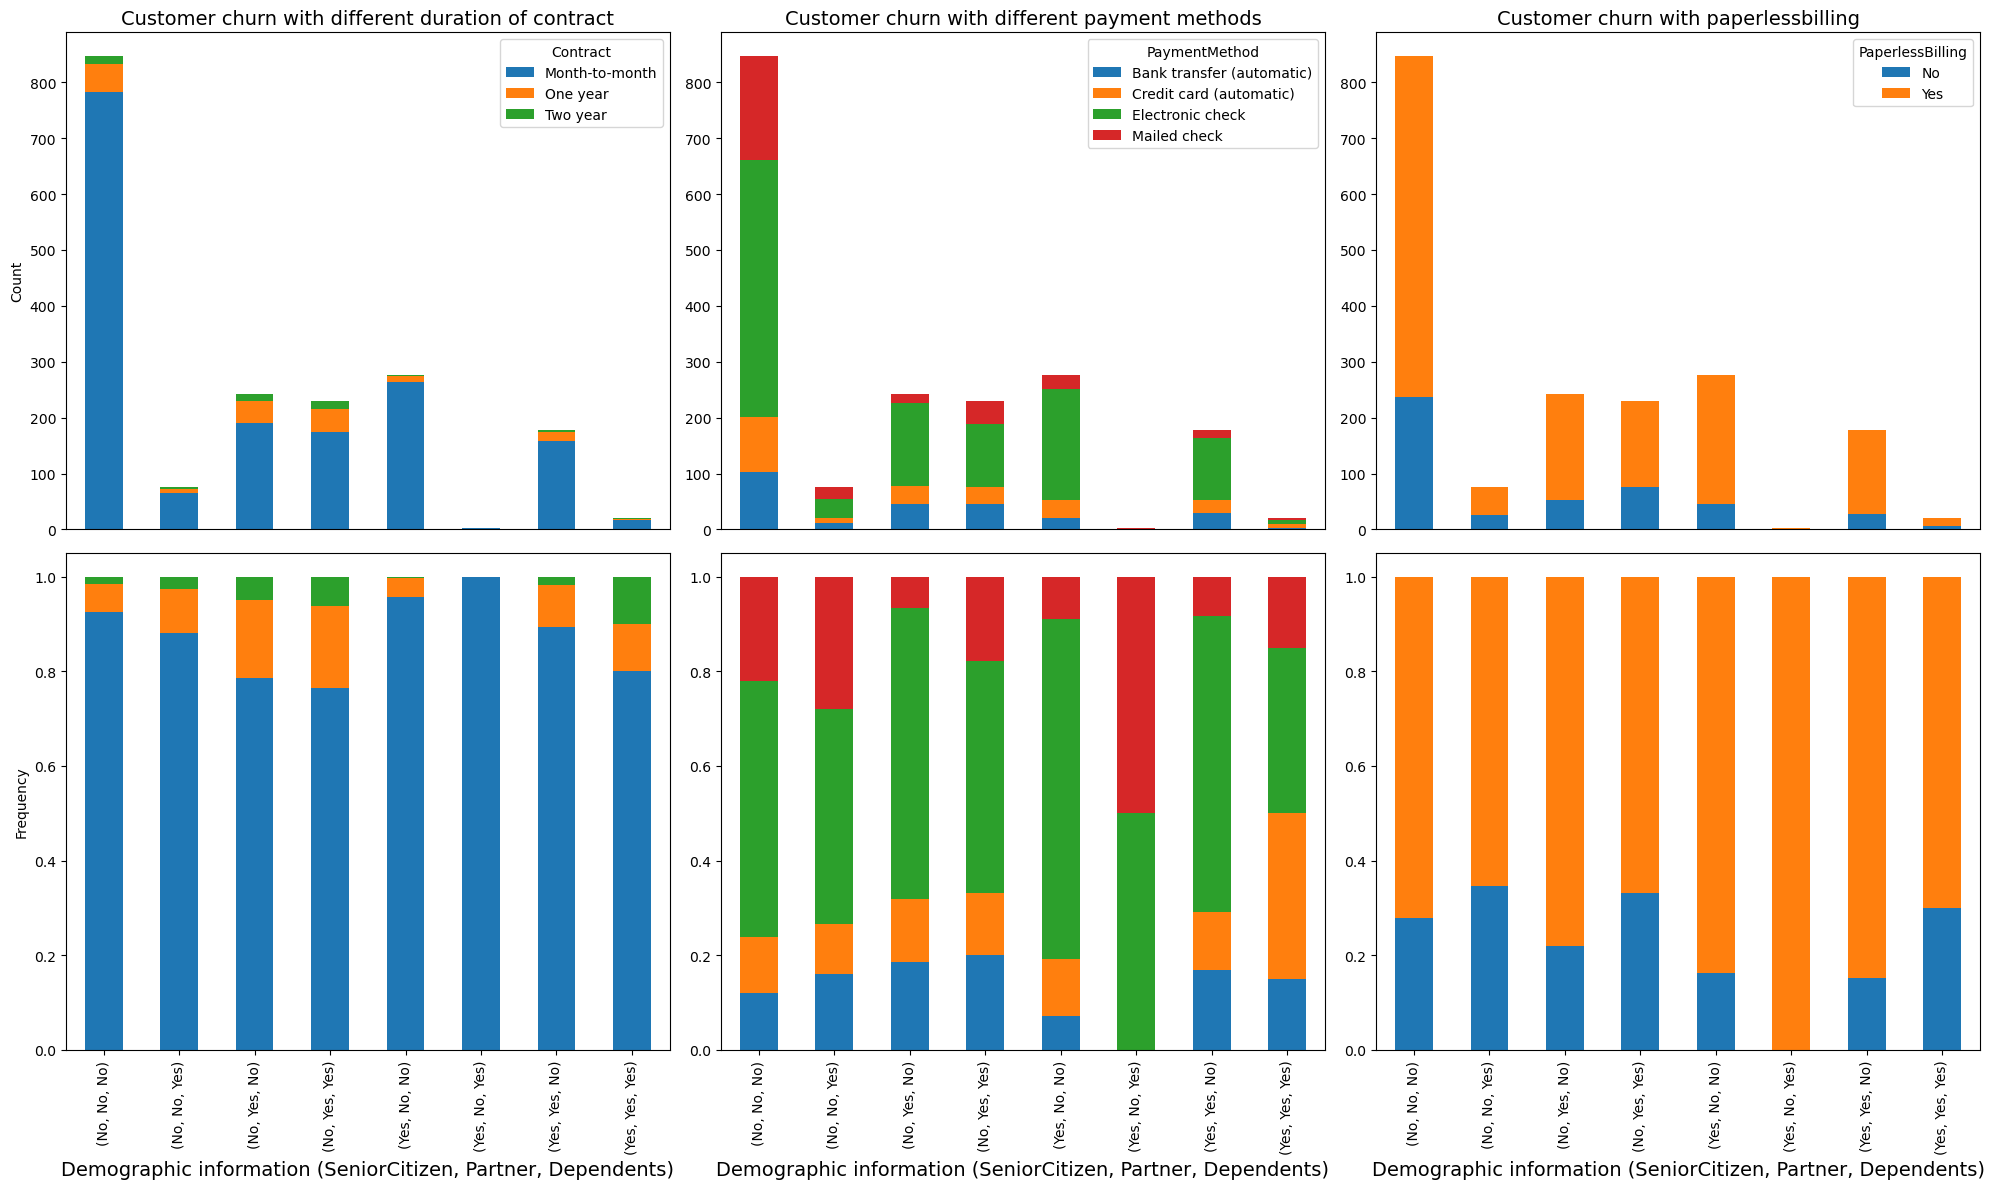

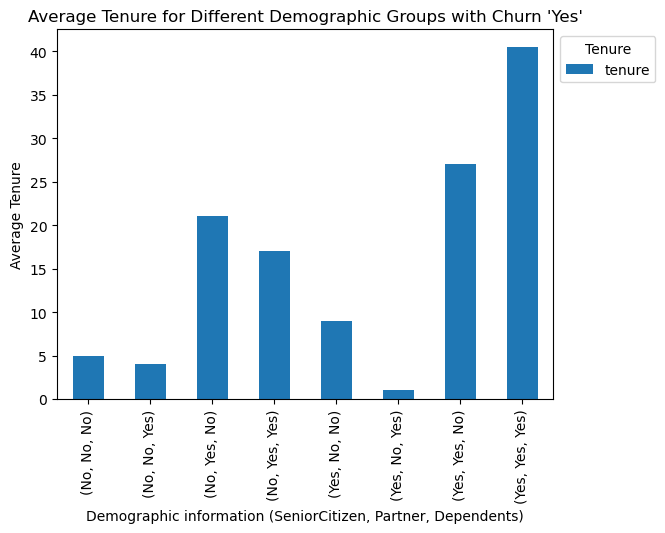

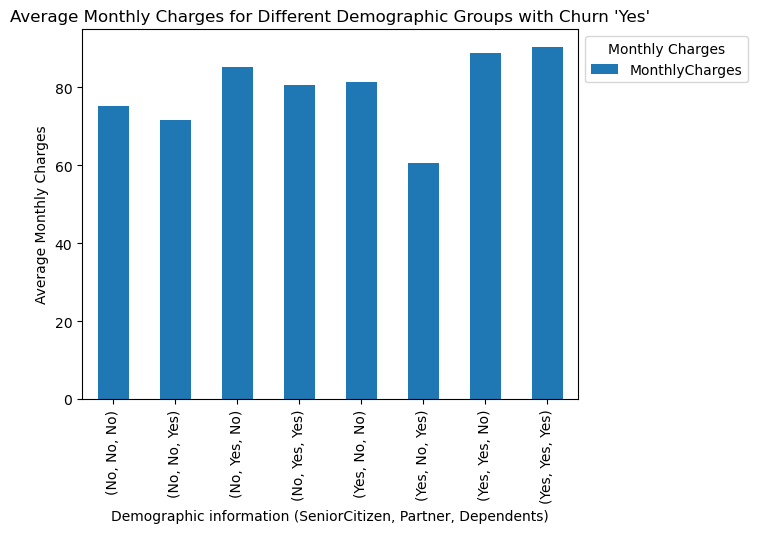

In [227]:
import matplotlib.pyplot as plt

# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
churn_yes_df = data[data['Churn'] == 'Yes']

# First subplot: Count of different duration of contract by demographic
ax3 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["Contract"].value_counts().unstack(level=3).plot(kind='bar', stacked=True, ax=axes[0, 0])
ax3.set_xlabel("")
ax3.set_xticks([])# Remove the x-label
ax3.set_ylabel("Count")
ax3.set_title("Customer churn with different duration of contract", fontsize =14)

# Second subplot: Count of different payment methods by demographic
ax4 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["PaymentMethod"].value_counts().unstack(level=3).plot(kind='bar', stacked=True, ax=axes[0, 1])
ax4.set_xlabel("") 
ax4.set_xticks([])# Remove the x-label
ax4.set_title("Customer churn with different payment methods", fontsize =14)

# Third subplot: Count of paperless billing by demographic
ax5 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["PaperlessBilling"].value_counts().unstack(level=3).plot(kind='bar', stacked=True, ax=axes[0, 2])
ax5.set_xlabel("") 
ax5.set_xticks([])# Remove the x-label
ax5.set_title("Customer churn with paperlessbilling", fontsize =14) 

# Under First subplot: Count of different duration of contract by demographic
ax6 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["Contract"].value_counts(normalize=True).unstack(level=3).plot(kind='bar', stacked=True, ax=axes[1, 0], legend=False)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=90)
ax6.set_xlabel("Demographic information (SeniorCitizen, Partner, Dependents)", fontsize =14)
ax6.set_ylabel("Frequency")

# Under Second subplot: Count of different payment methods by demographic
ax7 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["PaymentMethod"].value_counts(normalize=True).unstack(level=3).plot(kind='bar', stacked=True, ax=axes[1, 1],legend=False)
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=90)
ax7.set_xlabel("Demographic information (SeniorCitizen, Partner, Dependents)", fontsize =14)


# Under Third subplot: Count of paperless billing by demographic
ax8 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["PaperlessBilling"].value_counts(normalize=True).unstack(level=3).plot(kind='bar', stacked=True, ax=axes[1, 2],legend=False)
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=90)
ax8.set_xlabel("Demographic information (SeniorCitizen, Partner, Dependents)", fontsize =14)


# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()


# Group the data by ['SeniorCitizen', 'Partner', 'Dependents'] and calculate the average tenure
average_tenure_df = churn_yes_df.groupby(['SeniorCitizen', 'Partner', 'Dependents'])['tenure'].median().reset_index()

# Pivot the DataFrame to get 'SeniorCitizen', 'Partner', and 'Dependents' as columns
pivot_table_df = average_tenure_df.pivot_table(index=['SeniorCitizen', 'Partner', 'Dependents'], values='tenure')

# Create a stacked bar plot showing the average tenure for each group
pivot_table_df.plot(kind='bar', stacked=True)

# Set the labels for the plot
plt.xlabel("Demographic information (SeniorCitizen, Partner, Dependents)")
plt.ylabel("Average Tenure")
plt.title("Average Tenure for Different Demographic Groups with Churn 'Yes'")
plt.legend(title='Tenure', loc='upper left', bbox_to_anchor=(1, 1))


# Group the data by ['SeniorCitizen', 'Partner', 'Dependents'] and calculate the average monthly charges
average_tenure_df = churn_yes_df.groupby(['SeniorCitizen', 'Partner', 'Dependents'])['MonthlyCharges'].median().reset_index()

# Pivot the DataFrame to get 'SeniorCitizen', 'Partner', and 'Dependents' as columns
pivot_table_df = average_tenure_df.pivot_table(index=['SeniorCitizen', 'Partner', 'Dependents'], values='MonthlyCharges')

# Create a stacked bar plot showing the average tenure for each group
pivot_table_df.plot(kind='bar', stacked=True)

# Set the labels for the plot
plt.xlabel("Demographic information (SeniorCitizen, Partner, Dependents)")
plt.ylabel("Average Monthly Charges")
plt.title("Average Monthly Charges for Different Demographic Groups with Churn 'Yes'")
plt.legend(title='Monthly Charges', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


#### Customer Churn in Relation to Service Type

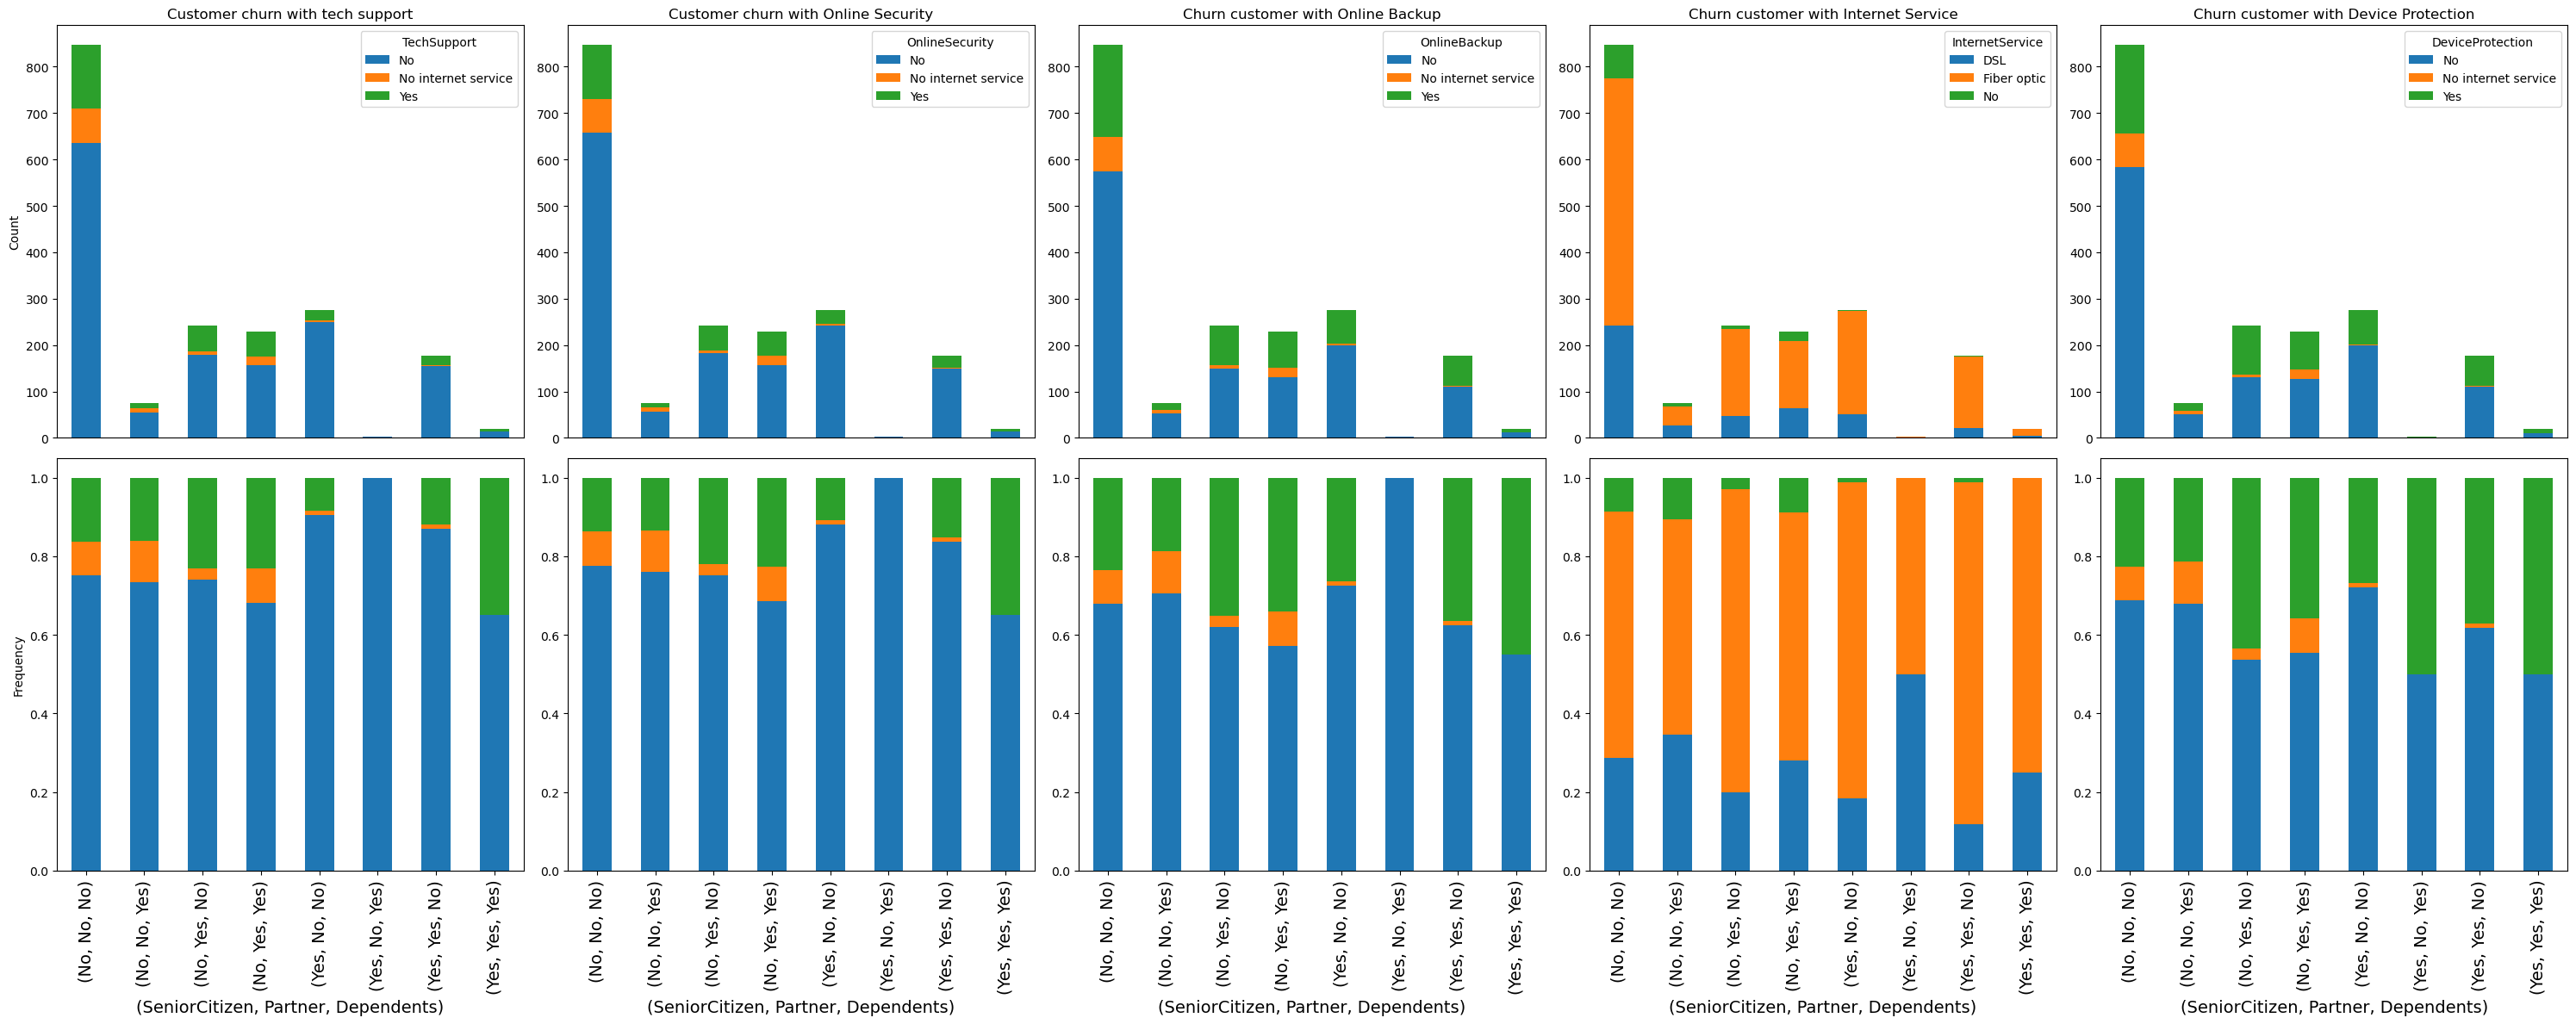

In [245]:
# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 12))
churn_yes_df = data[data['Churn'] == 'Yes']
# service = ['OnlineSecurity_No','TechSupport_No','InternetService_Fiber optic','OnlineBackup_No','DeviceProtection_No','InternetService_No','TechSupport_Yes','OnlineSecurity_Yes']


ax1 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["TechSupport"].value_counts().unstack(level=3).plot(kind='bar', stacked=True, ax=axes[0,0]) #group by, aggregate function, unpack level 4, contract
ax1.set_xlabel("")
ax1.set_xticks([])# Remove the x-label
ax1.set_ylabel("Count")
ax1.set_title("Customer churn with tech support")


ax2 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["OnlineSecurity"].value_counts().unstack(level=3).plot(kind='bar', stacked=True, ax=axes[0,1])
ax2.set_xlabel("")
ax2.set_xticks([])# Remove the x-label
ax2.set_title("Customer churn with Online Security")

ax3 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["OnlineBackup"].value_counts().unstack(level=3).plot(kind='bar', stacked=True, ax=axes[0,2])
ax3.set_xlabel("")
ax3.set_xticks([])# Remove the x-label
ax3.set_title("Churn customer with Online Backup")

ax4 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["InternetService"].value_counts().unstack(level=3).plot(kind='bar', stacked=True, ax=axes[0,3])
ax4.set_xlabel("")
ax4.set_xticks([])# Remove the x-label
ax4.set_title("Churn customer with Internet Service")

ax5 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["DeviceProtection"].value_counts().unstack(level=3).plot(kind='bar', stacked=True, ax=axes[0,4])
ax5.set_xlabel("")
ax5.set_xticks([])# Remove the x-label
ax5.set_title("Churn customer with Device Protection")


ax6 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["TechSupport"].value_counts(normalize=True).unstack(level=3).plot(kind='bar', stacked=True, ax=axes[1,0], legend=False) #group by, aggregate function, unpack level 4, contract
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=90,fontsize = 14)
ax6.set_xlabel("(SeniorCitizen, Partner, Dependents)", fontsize = 14)
ax6.set_ylabel("Frequency")

# Second subplot: Count of different payment methods by contract
ax7 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["OnlineSecurity"].value_counts(normalize=True).unstack(level=3).plot(kind='bar', stacked=True, ax=axes[1,1], legend=False)
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=90,fontsize = 14)
ax7.set_xlabel("(SeniorCitizen, Partner, Dependents)", fontsize = 14)

ax8 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["OnlineBackup"].value_counts(normalize=True).unstack(level=3).plot(kind='bar', stacked=True, ax=axes[1,2], legend=False)
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=90,fontsize = 14)
ax8.set_xlabel("(SeniorCitizen, Partner, Dependents)", fontsize = 14)

ax9 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["InternetService"].value_counts(normalize=True).unstack(level=3).plot(kind='bar', stacked=True, ax=axes[1,3], legend=False)
ax9.set_xticklabels(ax9.get_xticklabels(), rotation=90,fontsize = 14)
ax9.set_xlabel("(SeniorCitizen, Partner, Dependents)", fontsize = 14)

ax10 = churn_yes_df.groupby(["SeniorCitizen", "Partner", "Dependents"])["DeviceProtection"].value_counts(normalize=True).unstack(level=3).plot(kind='bar', stacked=True, ax=axes[1,4], legend=False)
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=90,fontsize = 14)
ax10.set_xlabel("(SeniorCitizen, Partner, Dependents)", fontsize = 14)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()

#### Analysis and Recommendations

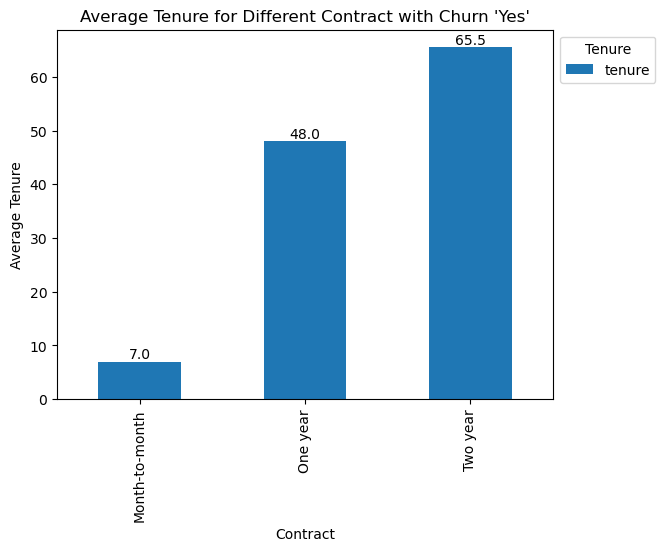

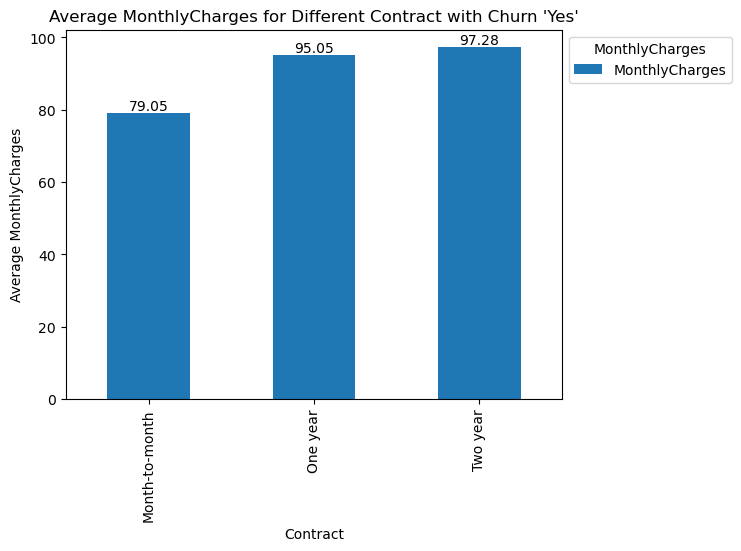

In [246]:
# churn_ye_df = encoded_data[encoded_data['Churn'] == 'Yes']
import matplotlib.pyplot as plt
churn_yes_df = data[(data['Churn'] == 'Yes')]
# Group the data by contract and calculate the average tenure
average_tenure_df = churn_yes_df.groupby(['Contract'])['tenure'].median().reset_index()

# Pivot the DataFrame to get 'SeniorCitizen', 'Partner', and 'Dependents' as columns
pivot_table_df = average_tenure_df.pivot_table(index=['Contract'], values='tenure')

# Create a stacked bar plot showing the average tenure for each group
ax = pivot_table_df.plot(kind='bar', stacked=True)

# Set the labels for the plot
plt.xlabel("Contract")
plt.ylabel("Average Tenure")
plt.title("Average Tenure for Different Contract with Churn 'Yes'")
plt.legend(title='Tenure', loc='upper left', bbox_to_anchor=(1, 1))

# Add real values on top of the bars
for i in ax.patches:
    ax.annotate(str(round(i.get_height(), 2)),  # Display the real value with 2 decimal places
                (i.get_x() + i.get_width() / 2, i.get_height()),  # Position of the value
                ha='center', va='bottom')

# Show the plot
plt.show()

# churn_ye_df = encoded_data[encoded_data['Churn'] == 'Yes']
import matplotlib.pyplot as plt

# Group the data by contract and calculate the average tenure
average_tenure_df = churn_yes_df.groupby(['Contract'])['MonthlyCharges'].median().reset_index()

# Pivot the DataFrame to get 'SeniorCitizen', 'Partner', and 'Dependents' as columns
pivot_table_df = average_tenure_df.pivot_table(index=['Contract'], values='MonthlyCharges')

# Create a stacked bar plot showing the average tenure for each group
ax = pivot_table_df.plot(kind='bar', stacked=True)

# Set the labels for the plot
plt.xlabel("Contract")
plt.ylabel("Average MonthlyCharges")
plt.title("Average MonthlyCharges for Different Contract with Churn 'Yes'")
plt.legend(title='MonthlyCharges', loc='upper left', bbox_to_anchor=(1, 1))

# Add real values on top of the bars
for i in ax.patches:
    ax.annotate(str(round(i.get_height(), 2)),  # Display the real value with 2 decimal places
                (i.get_x() + i.get_width() / 2, i.get_height()),  # Position of the value
                ha='center', va='bottom')

# Show the plot
plt.show()

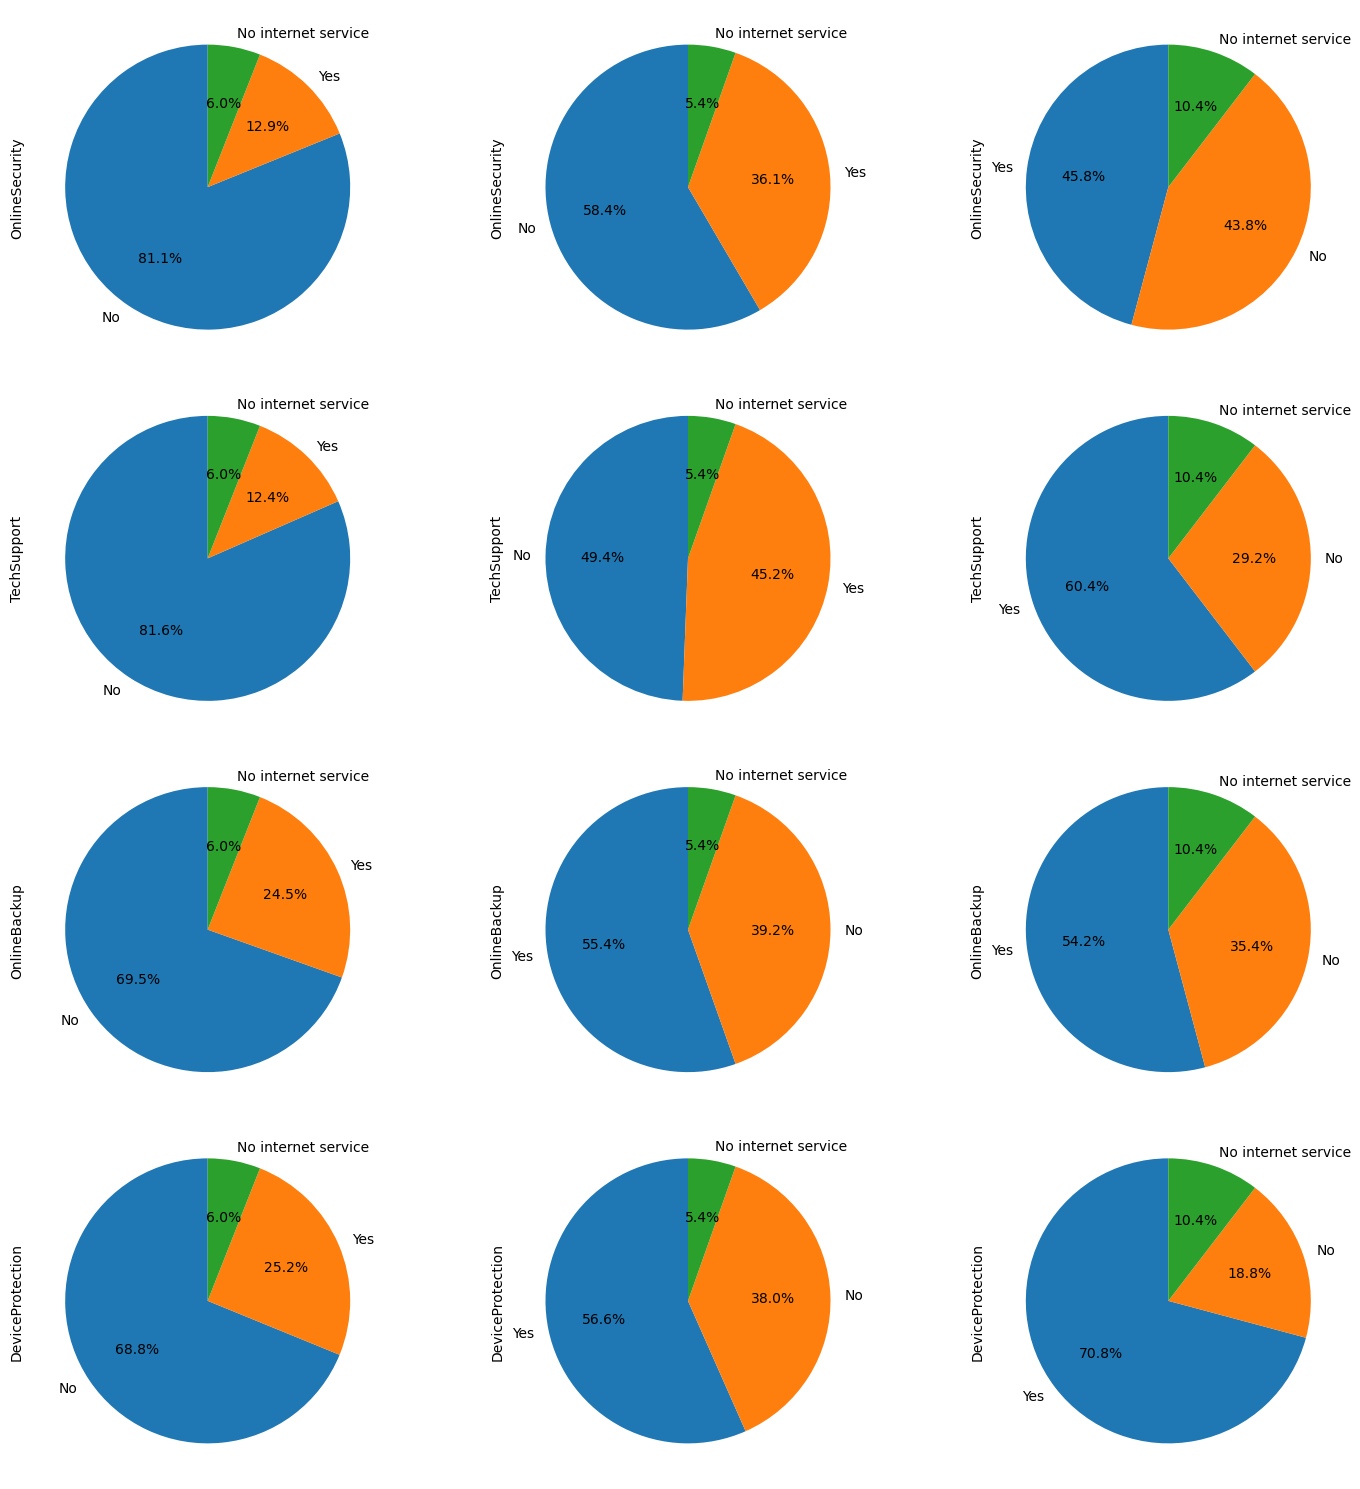

In [236]:
import matplotlib.pyplot as plt

# Filter the data for Month-to-month contracts and Churn 'Yes'
month_churn_yes_df = data[(data['Churn'] == 'Yes') & (data['Contract'] == 'Month-to-month')]
one_churn_yes_df = data[(data['Churn'] == 'Yes') & (data['Contract'] == 'One year')]
two_churn_yes_df = data[(data['Churn'] == 'Yes') & (data['Contract'] == 'Two year')]

# Create a figure with three subplots (1 row, 3 columns)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

#online security
online_security_counts = month_churn_yes_df['OnlineSecurity'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0,0])


online_security_counts = one_churn_yes_df['OnlineSecurity'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0,1])

online_security_counts = two_churn_yes_df['OnlineSecurity'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0,2])

#Techsupport

online_security_counts = month_churn_yes_df['TechSupport'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1,0])

online_security_counts = one_churn_yes_df['TechSupport'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1,1])

online_security_counts = two_churn_yes_df['TechSupport'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1,2])

#Online backup

online_security_counts = month_churn_yes_df['OnlineBackup'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[2,0])


online_security_counts = one_churn_yes_df['OnlineBackup'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[2,1])

online_security_counts = two_churn_yes_df['OnlineBackup'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[2,2])

#DeviceProtection

online_security_counts = month_churn_yes_df['DeviceProtection'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[3,0])


online_security_counts = one_churn_yes_df['DeviceProtection'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[3,1])

online_security_counts = two_churn_yes_df['DeviceProtection'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[3,2])

# Adjust spacing between subplots
plt.tight_layout()

# Display the pie charts
plt.show()


When analyzing different customer types, it becomes evident that signing a two-year contract plays a pivotal role in fostering longer service usage. In contrast, the majority of month-to-month subscribers tend to churn after approximately seven months. This trend points to underlying service-related issues; while customers may initially be content with the contract's offerings, the absence of critical services such as online security, online backup, tech support, and device protection becomes increasingly frustrating over time.

While the month-to-month option appears more affordable than the other two contract types (less than around 25 dollars), it restricts access to the complete range of services available in the one-year or two-year contracts. Based on our correlation analysis, I recommend encouraging customers to consider the 1-2 year contract option, which has demonstrated a positive impact on reducing churn.

For customers who may find it challenging to afford the longer contracts, the company should consider providing free access to online security and tech support, as these are the two factors that significantly influence churn. This short-term strategy aims to enhance customer satisfaction and create a positive brand image, eventually leading them to opt for longer contracts in the future when they experience the value of our services. By adopting these recommendations, the company can effectively increase customer retention and solidify its position as a leading service provider in customers' minds.

In addition to the interesting findings, we have noticed that some customers who do not use the internet service surprisingly do not churn. This raises a question about the quality of our company's internet service. It is intriguing to consider whether these customers are satisfied with the non-internet services offered or if there might be other reasons driving their decision to stay despite not using internet services. Conducting further analysis and gathering feedback from these specific customers could provide valuable insights into the factors influencing their retention. Understanding the reasons behind their continued loyalty can help us enhance our service offerings and cater to the diverse needs of our customer base more effectively. By exploring these aspects, we can strive to improve overall customer satisfaction and strengthen our position in the market.

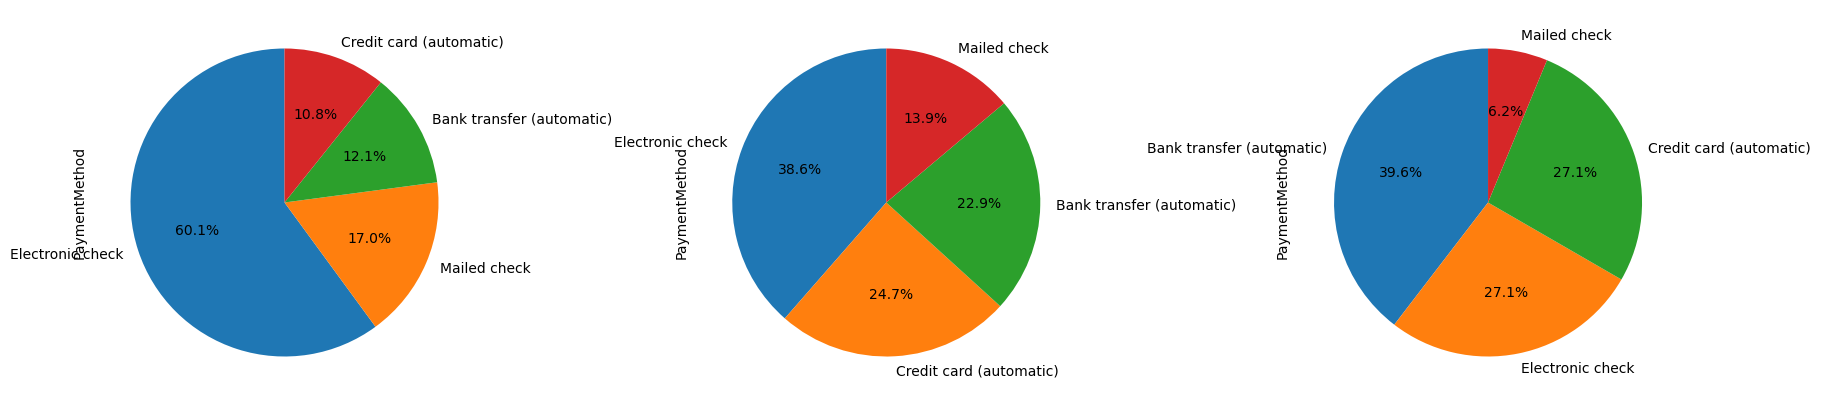

In [241]:


# Perform the aggregation on "PaymentMethod" to get the value counts
# Create a figure with three subplots (1 row, 3 columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

#online security
online_security_counts = month_churn_yes_df['PaymentMethod'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0])


online_security_counts = one_churn_yes_df['PaymentMethod'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1])

online_security_counts = two_churn_yes_df['PaymentMethod'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[2])


# Display the pie chart
plt.show()

Across all types of contracts and customers, there is a notable correlation between customer churn and the use of electronic checks for payment. While this payment method may be considered modern, it appears to deter users from continuing to use our company's services. On the other hand, automatic payment methods such as bank transfers and credit cards have shown potential in reducing churn rates for month-to-month contracts. Surprisingly, using mailed checks for payments in one-two year contracts has also demonstrated a positive impact on reducing churn.

Based on these findings, we recommend the following strategies:
1. Discourage the use of electronic checks for payment, or if customers still prefer this method, consider implementing an additional fee to incentivize them to switch to other payment options.
2. For customers with month-to-month contracts, prioritize and encourage the use of credit cards and bank transfers for payments. Offer attractive gifts or vouchers as incentives to motivate them to adopt these automatic payment methods, which have shown to be effective in reducing churn.
3. For customers with one-two year contracts, make mailed checks the priority method for payment. Additionally, consider adding fees for credit card and bank transfer payments to encourage the use of mailed checks, which have been associated with lower churn rates.

By implementing these payment-related recommendations, we can potentially improve customer retention across different contract types and ensure a seamless payment experience that aligns with customer preferences, ultimately reducing churn and enhancing customer satisfaction.

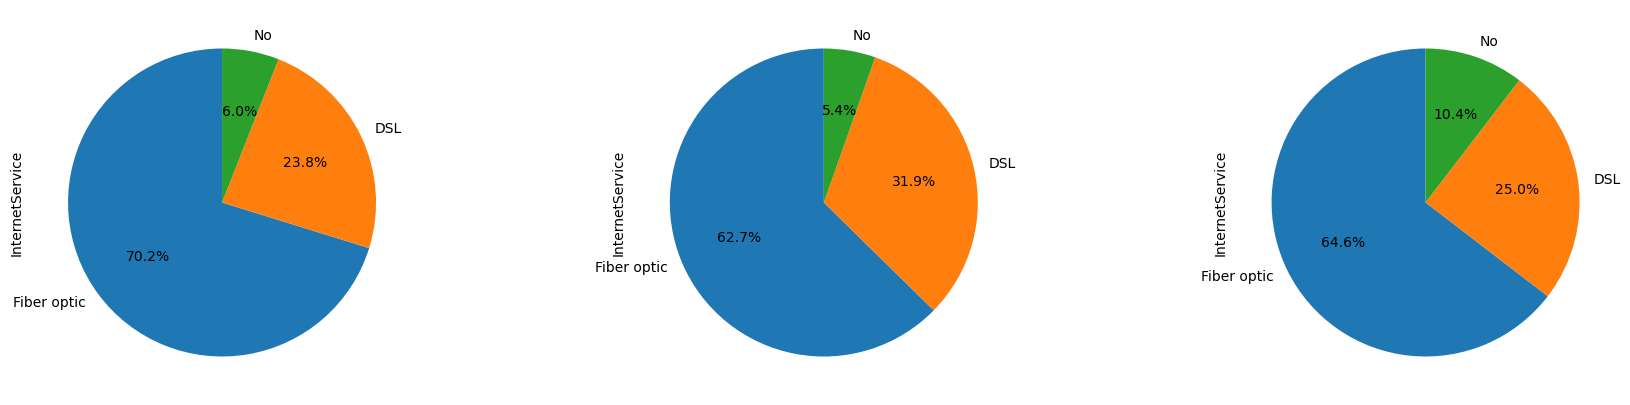

In [251]:


# Perform the aggregation on "PaymentMethod" to get the value counts
# Create a figure with three subplots (1 row, 3 columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

#online security
online_security_counts = month_churn_yes_df['InternetService'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0])


online_security_counts = one_churn_yes_df['InternetService'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1])

online_security_counts = two_churn_yes_df['InternetService'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[2])


# Display the pie chart
plt.show()

Supprisingly, in all type of contract and customers, most churn customer use internet fiber optic. It is the most modern method for internet, it is hard to make annoy for user. Look at correlation matrix, this technology price is high (0.79 correlation value with monthly charges), it demonstrate the reason cutomer churn may be by price. 
We consider to develop technology system in company to give lower prices for customers usesAn intriguing finding from our analysis is that across all contract types and customer segments, a significant number of churned customers are using internet fiber optic services. Despite its reputation as a modern and reliable method for internet connectivity, it appears to be associated with a high churn rate. Upon further examination of the correlation matrix, we notice that this technology is linked to higher prices, indicated by a strong correlation value of 0.79 with monthly charges. This suggests that pricing could be a major driver of customer churn.

To address this concern, we are actively considering developing a technology-driven pricing system within our company. This system aims to offer lower prices to customers who use internet fiber optic services, thereby making our services more accessible and attractive. By adopting a more competitive pricing strategy, we can potentially reduce churn and retain more satisfied customers, solidifying our position as a leading provider in the market. Moreover, we can monitor the impact of these pricing changes on customer retention and continuously fine-tune our pricing models based on customer feedback and preferences. Ultimately, this approach aligns with our commitment to providing quality services at competitive prices and nurturing long-term relationships with our valued customers.

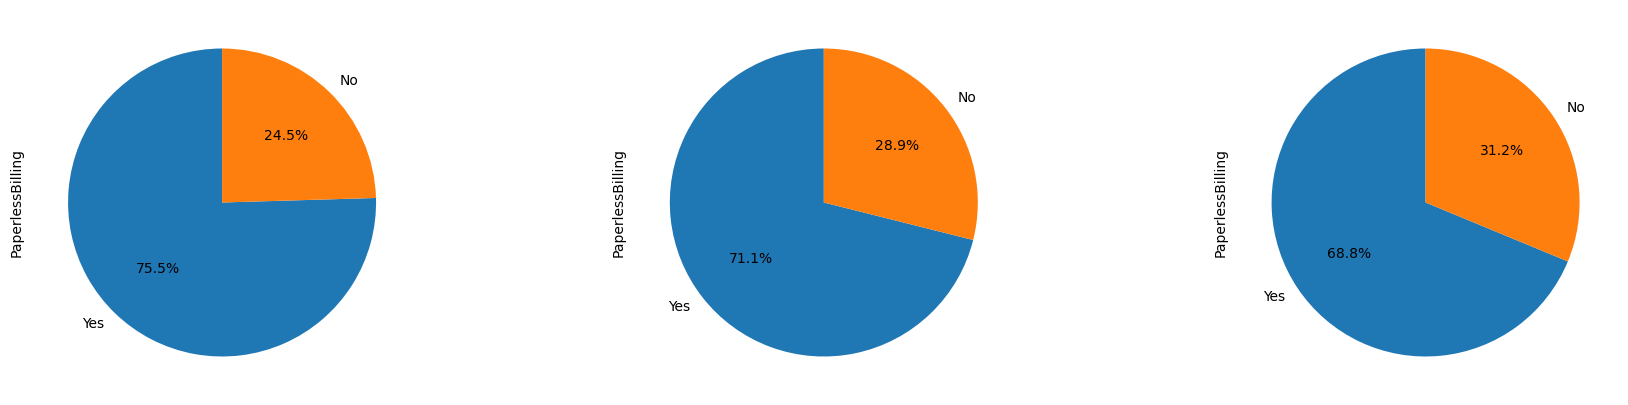

In [253]:
# Create a figure with three subplots (1 row, 3 columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

#online security
online_security_counts = month_churn_yes_df['PaperlessBilling'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0])


online_security_counts = one_churn_yes_df['PaperlessBilling'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1])

online_security_counts = two_churn_yes_df['PaperlessBilling'].value_counts()
ax2 = online_security_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[2])


# Display the pie chart
plt.show()

We assum that using paperlessbilling lead to churn of users. We recommend use paper billing after Based on our analysis, we have made the assumption that utilizing paperless billing could be contributing to customer churn. As a result, we recommend considering an alternative billing method, such as normal billing, after payment. By providing customers with the option to receive physical bills rather than relying solely on paperless billing, we aim to accommodate different preferences and potentially reduce churn rates. 

## CONCLUSION

In conclusion, customer churn is a crucial challenge that demands thorough analysis and proactive measures from businesses. Our data analysis has shed light on several significant factors influencing churn, including contract type, payment method, service availability, and customer demographics. Armed with this knowledge, we can craft tailored retention strategies and targeted solutions to effectively reduce churn rates.

To further enhance our efforts, it is essential to leverage A/B testing in real-life scenarios. This approach allows us to experiment with different strategies and measure their impact on churn, helping us identify the most effective tactics for customer retention.

Here are the general recommendations:

1. Enhance Customer Profiling: Gathering more detailed demographic information such as specific age groups, addresses, and other relevant data will provide valuable insights into customer preferences and needs. Utilizing this information, we can recommend personalized and suitable services to individual customers, fostering stronger connections and loyalty.

2. Technology System Development: Investing in advanced technology systems focused on security, backup, and tech support will bolster our service offerings. By providing a seamless and reliable customer experience, we can increase satisfaction levels and ultimately reduce churn rates.

3. Optimize Price Strategies: Thorough research and analysis of price strategies will help us identify optimal pricing for our services. Offering competitive pricing that aligns with customer expectations and the value they perceive will contribute to customer retention and satisfaction.

4. Internet Service Consideration: Given the lower churn rate among customers who do not use internet services, we need to delve deeper into understanding the reasons behind this trend. Evaluating the quality of our internet services, identifying any pain points, and making necessary improvements can have a positive impact on overall customer churn.

These specific actions demonstrate a comprehensive approach to addressing customer churn and fostering customer loyalty:

1. Conduct targeted marketing for senior citizens who are single and not dependent on anyone. Analyze their demographic data to design personalized marketing strategies that align with their preferences and needs.

2. Gather more information about senior citizens without partners but having dependents to understand their reasons for not using the company's services fully. This insight can help identify potential pain points and tailor solutions to retain them as loyal customers.

3. Encourage customers to subscribe to 1-2 year contracts by offering discounts and lower prices for essential services like online security, online backup, 24/7 tech support, device protection, and streaming options. This incentivizes long-term commitments and strengthens customer retention.

4. For customers on month-to-month contracts, consider adding online security and tech support as additional benefits. Alternatively, offer free trial periods to use all company services under the month-to-month plan, then promote them to switch to 1-2 year contracts later.

5. Utilize cutting-edge technologies like AI for tech support and blockchain for online security to optimize pricing for each plan, ensuring competitive pricing that aligns with customer preferences.

6. Investigate the quality of internet services to identify potential reasons why some customers do not use it, thus reducing the churn rate among this customer segment.

7. Discourage the use of electronic checks for payment, or if customers prefer this method, consider implementing an additional fee to encourage them to explore other payment options.

8. For customers with month-to-month contracts, prioritize credit card and bank transfer payments, offering attractive gifts or vouchers as incentives to adopt these automatic payment methods, known to reduce churn.

9. For customers with one-two year contracts, prioritize mailed checks for payment. Introduce additional fees for credit card and bank transfer payments to promote the use of mailed checks, linked to lower churn rates.

10. Explore options to reduce the cost of fiber optic technology, making it more accessible and appealing to customers.

11. Offer the choice of paper billing instead of paperless billing to cater to customer preferences. However, carefully evaluate the associated costs to ensure feasibility and cost-effectiveness.

By implementing these recommendations and continuously adapting our strategies based on real-time feedback and data, we can foster stronger customer relationships, increase loyalty, and establish a competitive edge in the market. A customer-centric approach supported by data-driven insights will be instrumental in tackling customer churn effectively and ensuring sustainable growth for our business.